
# Loan Default Prediction

- Capstone Project
- Submitted by Sreenivas Angara 
    - Sreenivas.Angara@gmail.com
    
- Date: June 6 2023



<a id="toc"> </a>
## Table of contents
1. **[Problem Definition](#problem)**
1. **[Data Description](#data_description)**
1. **[Read and Review dataset](#inspect)**
3. **[Exploratory Data Analysis](#eda)**
    1. [Univariate Analysis](#univariate)
    2. [Bivariate Analysis](#bivariate)
    3. [MultiVariate Analysis](#multivariate)
    4. [Observations - Exploratory Data Analysis](#eda_observations)
4. **[Data Preprocessing](#feature_engg)**
4. **[Models - Build and Score](#models)**
    1. [Classification Modelling process](#modelling_process)
    2. [Logistic Regression](#logistic_regression)
    1. [Decision Tree Classification](#decision_tree)
    1. [RandomForest Classification](#RandomForest)
    1. [Bagging Classification](#BaggingClassifier)
    1. [AdaBoostClassifier Classification](#AdaBoostClassifier)
    1. [XGBoost Classification](#XGBoostClassifier)
    1. [HistGradientBoosting Classification](#HistGradientBoostingClassifier)
4. **[Hyperparameter Tuning](#hyperparameter)**
4. **[Stacked Classification](#stacked_classification)**
4. **[Support Vector Machine Classification](#svm)**
4. **[Comparing Model Performances](#model_performance)**
    1. [Performance Report](#performance_report)
10. **[Summary and Insights](#summary)**
11. **[Testing for Null Hypothesis](#nullhypothesis)**

<a id="problem"></a>

&#9194;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[2. Data Description](#data_description)**
&emsp;
&#9193;

## **1. Problem Definition**
<hr>
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.

**Objective -** Identify loans that are likely to default based on these 12 input variables

### **The Context:**

The problem at hand is that the business is incurring significant financial losses due to defaulted loans. To address this issue, we aim to leverage machine learning techniques to develop models that can accurately identify potential loan defaults.

### **The objective:**

Identify Loans
- That will default (True Positive)
- That are likely to default (False Negative)

Model performance
- For measuring model performance we will use 3 metrics
    - **Precision** - It is the measure on the accuracy of the prediction. 
        - Maximize True Positives - Loans that will default
        - Minimize True Negatives(TN) - Once a loan is in 'Default' cost to business is high
    - **Recall**
        - Minimize False Negatives(FN) 
            - This metric influences resource allocation cost to review loans likely to default
            - The magnitude of 'Cash reserves' to allocate for potential defaults
    -  **Receiver Operating Characteristic Curve (AUC-ROC)**
        - A higher AUC-ROC indicates a better-performing model

### **The key questions:**

Key questions that need to be answered are:
- Are there sufficient input variables to make predictions?
- How do we handle missing data?
- Which input variables influence Loan defaults?
- Which modelling methods provide robust predictions?


### **The problem formulation**:

The approach solving this problem using data science is by following these general steps:

1. Exploratory Data Analysis (EDA): Perform an in-depth exploration of the loan default dataset to gain a comprehensive understanding of its structure, features, and patterns. This involves analyzing descriptive statistics, visualizations, and identifying any data anomalies or outliers.

2. Data Preprocessing: Cleanse the dataset by addressing missing values, outliers, and inconsistencies. Imputation techniques can be used to fill missing values, while outlier detection and handling methods can be employed to address any extreme data points. Additionally, data normalization and feature scaling may be applied to ensure compatibility across variables.

3. Feature Engineering: Identify and create new features from the existing dataset that could potentially enhance the prediction power of the models. This could involve transforming variables, creating interaction terms, or extracting relevant information from existing features.

4. Model Selection: Choose appropriate machine learning algorithms that are suitable for predicting loan defaults. Commonly used algorithms for binary classification tasks like loan default prediction include logistic regression, decision trees, random forests, support vector machines (SVM), or gradient boosting models.

5. Model Training and Evaluation: Split the dataset into training and testing sets. Train the selected models on the training data and evaluate their performance using appropriate evaluation metrics such as accuracy, precision, recall, F1 score, and area under the receiver operating characteristic curve (AUC-ROC). Cross-validation techniques can also be applied to ensure robust model performance.

6. Model Optimization: Fine-tune the selected models by tuning hyperparameters to improve their performance. Techniques like grid search or randomized search can be employed to find the optimal combination of hyperparameters.

By following these steps, data science can provide valuable insights and predictive models to help businesses proactively identify potential loan defaults, minimize risks, and optimize decision-making in the lending process.

Measure model performance

When evaluating the performance of models for loan default prediction, you can consider the following metrics:

1. Accuracy: It measures the overall correctness of the model's predictions and is calculated as the ratio of correctly predicted instances to the total number of instances. However, accuracy alone may not be sufficient if the dataset is imbalanced, i.e., if there are significantly more instances of non-defaults compared to defaults.

2. Precision: It represents the proportion of correctly predicted default instances among all instances predicted as defaults. Precision is valuable when the focus is on minimizing false positives, i.e., incorrectly predicting a loan default when it is not actually going to default.

3. Recall (Sensitivity): It measures the proportion of correctly predicted default instances out of all actual defaults. Recall is useful when the emphasis is on minimizing false negatives, i.e., correctly identifying all instances that will default.

4. F1 Score: It is the harmonic mean of precision and recall, providing a balanced measure that considers both precision and recall. The F1 score is suitable when you want to strike a balance between precision and recall.

5. Area Under the Receiver Operating Characteristic Curve (AUC-ROC): It measures the model's ability to distinguish between default and non-default instances across various probability thresholds. A higher AUC-ROC indicates a better-performing model, with a value of 0.5 representing random guessing and 1.0 representing a perfect classifier.

6. Specificity: It represents the proportion of correctly predicted non-default instances out of all actual non-defaults. Specificity is valuable when the focus is on minimizing false negatives, i.e., correctly identifying all instances that will not default.

These metrics provide different perspectives on the performance of the model and help assess its effectiveness in predicting loan defaults. The choice of metrics depends on the specific objectives and requirements of your business. It is recommended to consider a combination of these metrics to gain a comprehensive understanding of the model's performance.


   

<a id="data_description"></a>

&#9194;
**[1. Problem Definition](#problem)**
&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[3. Read and Review dataset](#inspect)**
&#9193;

## **2. Data Description:**
<hr>
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, argmax

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder, RobustScaler

from sklearn import metrics
from sklearn.metrics import (
        confusion_matrix, classification_report,accuracy_score, precision_recall_curve,
        precision_score,recall_score,f1_score, roc_curve, roc_auc_score )

from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, \
    AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer,KNNImputer
from sklearn.compose import ColumnTransformer

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline

import missingno as msno

import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

## Helper functions for the Data Analaysis and Model scoring
## Helper functions used in this section

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          ax=None,
                          cmap='Blues',
                          title=None,
                          xlabel="Actual",
                          ylabel="Predicted"):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    if (ax == None):
        plt.figure(figsize=figsize)
        ax = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
        ax.set(xlabel=xlabel, ylabel=ylabel)
    else:
        sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories,ax=ax)
        ax.set(xlabel=xlabel, ylabel=ylabel)

    
    if title:
        plt.title(title)
        
## Show metrics for Models after fit() and predict()
def metrics_score2(model_name, y_test, prediction, y_scores):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:,1])

    auc = roc_auc_score(y_test,y_scores[:,1])
    
    print(f'{model_name} - AUC: {str(round(auc, 2))}\n')
    print(f"{model_name} Classification Report")
    print("-"*40)
    print(classification_report(y_test, prediction))
    
    gmeans = sqrt(tpr * (1-fpr))
    ix = argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    
    fig = plt.figure(figsize=(12,6))
    
    # plot ROC curve
    # Plot the diagonal 50% line
    f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 5]}, figsize=(12,6))
    plt.subplots_adjust(
                    wspace=0.2)

    a0.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    a0.plot(fpr, tpr)
    a0.set_xlabel('False Positive Rate')
    a0.set_ylabel('True Positive Rate')
    a0.set_title('ROC Curve')
    
    a0.scatter(fpr[ix], tpr[ix], marker='o', color='red', label='Best')
    
    ## Precision-Recall curve

 
    cm=confusion_matrix(y_test, prediction)
    labels = ['Repaid','undetected Defaults','Default - False flag','Defaulted']
    categories = [ 'Repaid','Default']
    make_confusion_matrix(cm, 
                          group_names=labels,
                          categories=categories, 
                          cmap='Blues', title=model_name+" - Acutals vs Predicted",
                          ax=a1)
    plt.show()


# Functions used in EDA. 
def histogram_boxplot(data, feature, figsize=(9, 3), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height() + 10       # height of the plot
        ax.annotate(percentage, (x, y), size = 10) # annotate the percentage 
        
    plt.show() # show the plot

<a id="inspect"> </a>

&#9194;
**[2. Data Description](#data_description)**
&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[4. Exploratory Data Analysis](#eda)**
&#9193;

## **3. Read and Review the dataset**
<hr>
<li>Use Pandas functions head(), tail(), info(), describe(), shape, info(), count null values and rename columns to descriptive names
<li> Convert 'object' datatype to 'category' for efficient processing
<br>


In [2]:
hm=pd.read_csv("datasets/hmeq.csv")

# Copying data to another variable to avoid any changes to original data
data=hm.copy()

## Rename column names to more descriptive names
cols_names={"BAD":"loan_defaulted",
          "LOAN":"loan_amount",
          "MORTDUE":"mortgage_due",
          "VALUE":"property_value",
          "REASON":"loan_reason",
          "JOB":"job_type",
          "YOJ":"years_on_job",
          "DEROG":"num_delinq_reports",
          "DELINQ":"num_delinquencies",
          "CLAGE":"credit_line_age",
          "NINQ":"num_credit_inquiries",
          "CLNO":"num_credit_lines",
          "DEBTINC":"debt_income_ratio"}

data.rename(columns=cols_names, inplace=True)
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
loan_defaulted,1,1,1,1,0,1,1,1,1,1
loan_amount,1100,1300,1500,1500,1700,1700,1800,1800,2000,2000
mortgage_due,25860.0,70053.0,13500.0,NaN,97800.0,30548.0,48649.0,28502.0,32700.0,NaN
property_value,39025.0,68400.0,16700.0,NaN,112000.0,40320.0,57037.0,43034.0,46740.0,62250.0
loan_reason,HomeImp,HomeImp,HomeImp,NaN,HomeImp,HomeImp,HomeImp,HomeImp,HomeImp,HomeImp
job_type,Other,Other,Other,NaN,Office,Other,Other,Other,Other,Sales
years_on_job,10.5,7.0,4.0,NaN,3.0,9.0,5.0,11.0,3.0,16.0
num_delinq_reports,0.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,0.0,0.0
num_delinquencies,0.0,2.0,0.0,NaN,0.0,0.0,2.0,0.0,2.0,0.0
credit_line_age,94.366667,121.833333,149.466667,NaN,93.333333,101.466002,77.1,88.76603,216.933333,115.8


In [3]:
display(data.tail(10).T)
print("Shape of the Data: ", data.shape)

,5950,5951,5952,5953,5954,5955,5956,5957,5958,5959
loan_defaulted,0,0,0,0,0,0,0,0,0,0
loan_amount,87500,88300,88500,88800,88900,88900,89000,89200,89800,89900
mortgage_due,55938.0,54004.0,50240.0,53307.0,48919.0,57264.0,54576.0,54045.0,50370.0,48811.0
property_value,86794.0,94838.0,94687.0,94058.0,93371.0,90185.0,92937.0,92924.0,91861.0,88934.0
loan_reason,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon
job_type,Other,Other,Other,Other,Other,Other,Other,Other,Other,Other
years_on_job,15.0,16.0,16.0,16.0,15.0,16.0,16.0,15.0,14.0,15.0
num_delinq_reports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_delinquencies,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
credit_line_age,223.88104,193.702051,214.426206,218.304978,205.650159,221.808718,208.69207,212.279697,213.892709,219.601002


Shape of the Data:  (5960, 13)


In [4]:
data.info() ## Inspect datatypes and detect missing values - For ex: DEBTINC has significant missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_defaulted        5960 non-null   int64  
 1   loan_amount           5960 non-null   int64  
 2   mortgage_due          5442 non-null   float64
 3   property_value        5848 non-null   float64
 4   loan_reason           5708 non-null   object 
 5   job_type              5681 non-null   object 
 6   years_on_job          5445 non-null   float64
 7   num_delinq_reports    5252 non-null   float64
 8   num_delinquencies     5380 non-null   float64
 9   credit_line_age       5652 non-null   float64
 10  num_credit_inquiries  5450 non-null   float64
 11  num_credit_lines      5738 non-null   float64
 12  debt_income_ratio     4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_defaulted,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
loan_amount,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
mortgage_due,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
property_value,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
years_on_job,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
num_delinq_reports,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
num_delinquencies,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
credit_line_age,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
num_credit_inquiries,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
num_credit_lines,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


<AxesSubplot:>

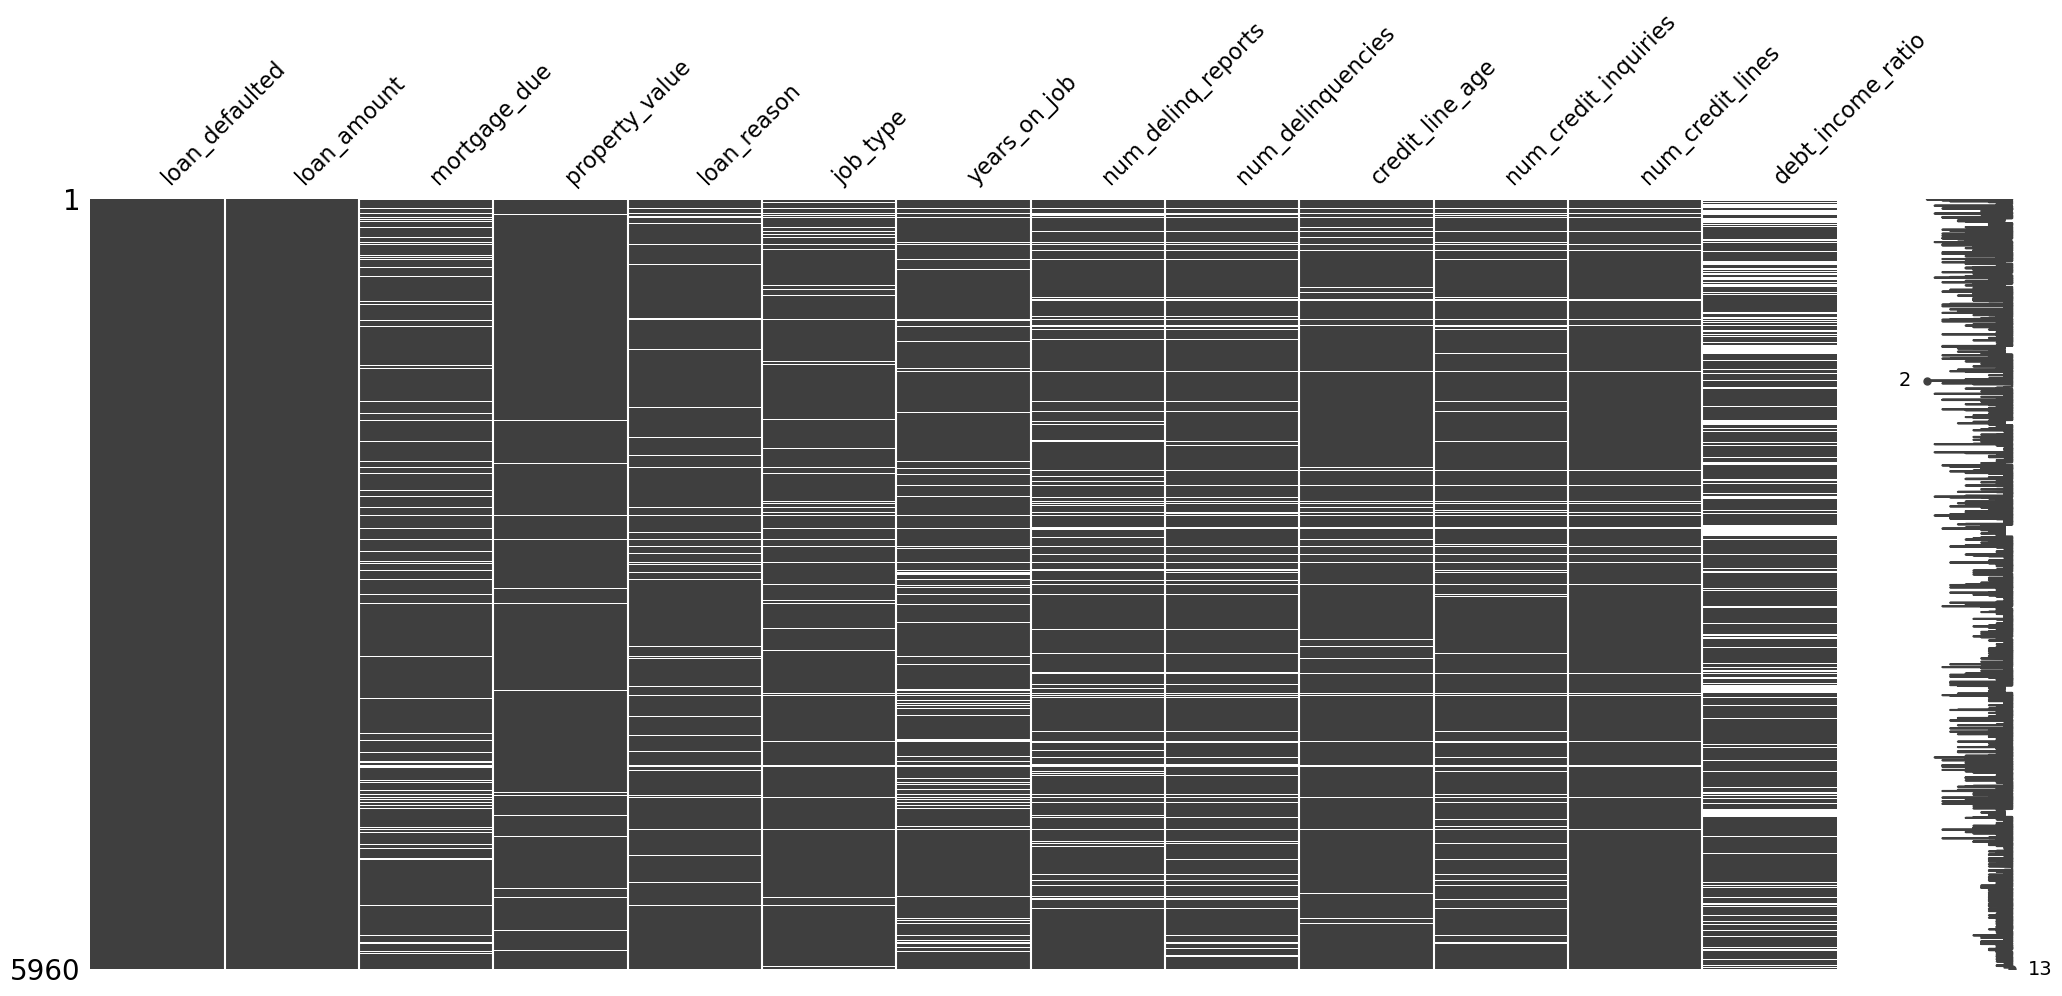

In [6]:
msno.matrix(data)

In [7]:
# Count for unique values to find categorical variables
for i in data.columns:
    print(f'{i} : {data[i].nunique()} values')

loan_defaulted : 2 values
loan_amount : 540 values
mortgage_due : 5053 values
property_value : 5381 values
loan_reason : 2 values
job_type : 6 values
years_on_job : 99 values
num_delinq_reports : 11 values
num_delinquencies : 14 values
credit_line_age : 5314 values
num_credit_inquiries : 16 values
num_credit_lines : 62 values
debt_income_ratio : 4693 values


In [8]:
## Change 'object' datatype to 'category' for efficient processing
## bad_loan is our target and is categorical. Its value either 0 or 1
## loan_reason and job_type have 6 and 2 unique values respectively

for i in ['job_type', 'loan_reason']:
    data[i] = data[i].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_defaulted        5960 non-null   int64   
 1   loan_amount           5960 non-null   int64   
 2   mortgage_due          5442 non-null   float64 
 3   property_value        5848 non-null   float64 
 4   loan_reason           5708 non-null   category
 5   job_type              5681 non-null   category
 6   years_on_job          5445 non-null   float64 
 7   num_delinq_reports    5252 non-null   float64 
 8   num_delinquencies     5380 non-null   float64 
 9   credit_line_age       5652 non-null   float64 
 10  num_credit_inquiries  5450 non-null   float64 
 11  num_credit_lines      5738 non-null   float64 
 12  debt_income_ratio     4693 non-null   float64 
dtypes: category(2), float64(9), int64(2)
memory usage: 524.3 KB


In [9]:
data.isnull().sum().sort_values(ascending=False) ## Another way to get missing values

debt_income_ratio       1267
num_delinq_reports       708
num_delinquencies        580
mortgage_due             518
years_on_job             515
num_credit_inquiries     510
credit_line_age          308
job_type                 279
loan_reason              252
num_credit_lines         222
property_value           112
loan_defaulted             0
loan_amount                0
dtype: int64

In [10]:
## Get count of null values for each column

#df.isnull().sum().sort_values(ascending=False) ## Another way to get missing values
null_count = pd.DataFrame(data=[data.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (data.isna().sum()/data.shape[0]*100).tolist()]], 
               columns=data.columns, index=['NaN Count', 'NaN Percent']).transpose().sort_values(by='NaN Count', ascending=False)

null_count.style.background_gradient(cmap="Blues", subset=['NaN Count'])

,NaN Count,NaN Percent
debt_income_ratio,1267,21.26%
num_delinq_reports,708,11.88%
num_delinquencies,580,9.73%
mortgage_due,518,8.69%
years_on_job,515,8.64%
num_credit_inquiries,510,8.56%
credit_line_age,308,5.17%
job_type,279,4.68%
loan_reason,252,4.23%
num_credit_lines,222,3.72%


**Insights**
- Columns were not descriptive. Changed to more descriptive names
- debt_income_ratio has a high number of null values > 20%. For this exercise, the code is flexible. By changing a single line of code in the 'Data Preprocessing' section we can build models with or without this predictor variable
- Dataset has both numerical and categorical variables
- A few rows have nulls for all predictor variables - For ex. row index 3
- Target class 'loan_defaulted' is a Binary classification problem (0 or 1) to solve, has no missing values
- num_delinq_reports & num_delinquencies are not in 75% IQR. Yet they have meaningful mean and std values
- loan_amount has no missing values

<hr>

<a id='eda'></a>

&#9194;
**[3. Read and Understand Dataset](#inspect)**
&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[5. Data Preparation](#feature_engg)**
&#9193;

## 4. Exploratory Data Analysis section
<hr>

**[Univariate Analysis](#univariate)**
&emsp;&#9679;&emsp;
**[Bivariate Analysis](#bivariate)**
&emsp;&#9679;&emsp;
**[Multivariate Analysis](#multivariate)**

<a id="univariate"></a>
### EDA - Univariate Analysis

In [11]:
## Define numerical and categorial features

num_features = ['loan_amount', 'mortgage_due', 'property_value', 'years_on_job', 'num_delinq_reports', 'num_delinquencies', 'credit_line_age', 'num_credit_inquiries', 'num_credit_lines', 'debt_income_ratio']
cat_features = ['loan_reason', 'job_type']

#data[num_features].head()            # Quick sanity check
#data[cat_features].head()            # Quick sanity check

# check unique values on categorical values
print("Categorical features and their values: \n")
for features in cat_features:
    print(f'{features} has {data[features].unique()} categories.\n')


Categorical features and their values: 

loan_reason has ['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp'] categories.

job_type has ['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self'] categories.



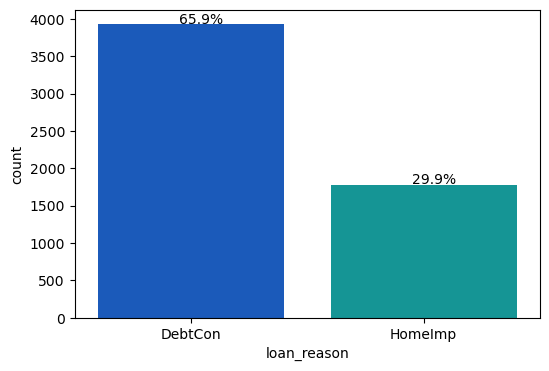

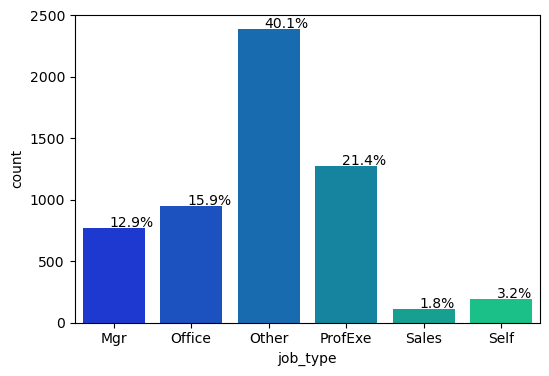

In [12]:
for feature in cat_features:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data[feature],palette='winter')
    perc_on_bar(ax,data[feature])
    plt.show()

loan_amount
Skew : 2.02


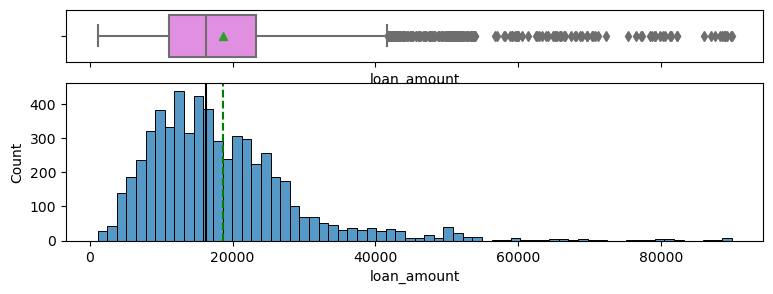

mortgage_due
Skew : 1.81


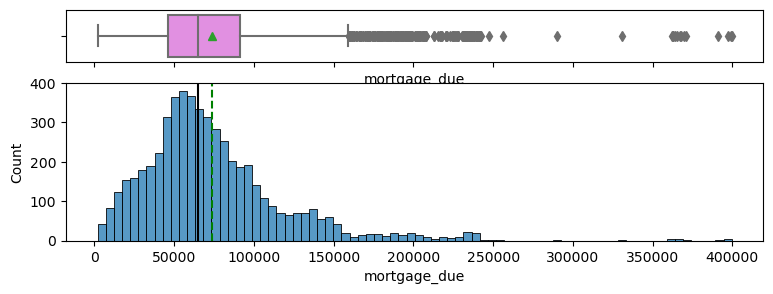

property_value
Skew : 3.05


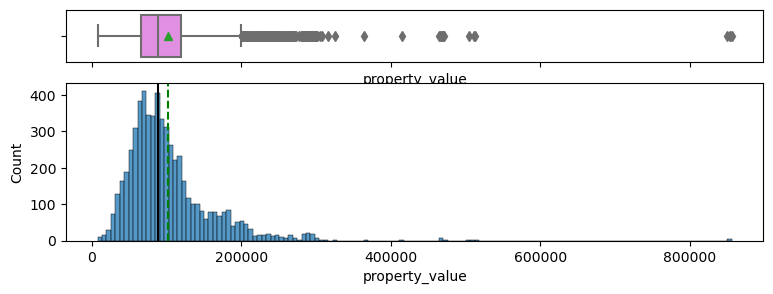

years_on_job
Skew : 0.99


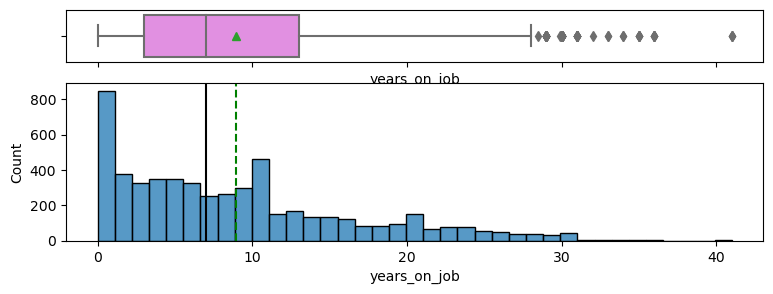

num_delinq_reports
Skew : 5.32


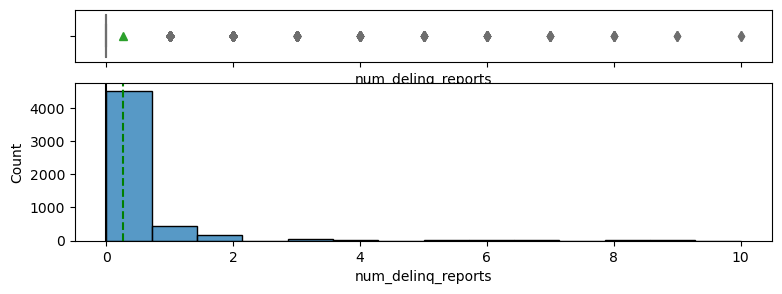

num_delinquencies
Skew : 4.02


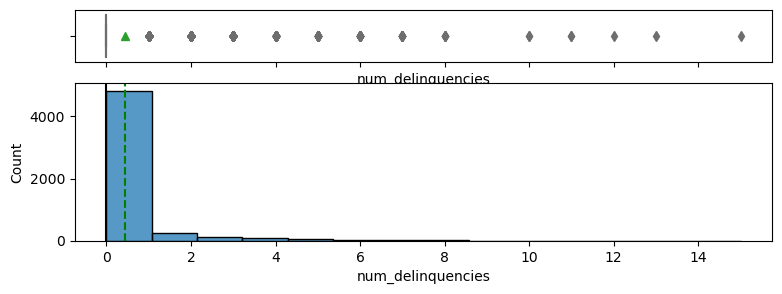

credit_line_age
Skew : 1.34


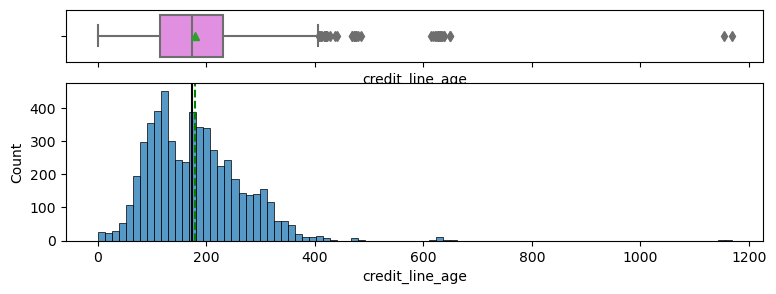

num_credit_inquiries
Skew : 2.62


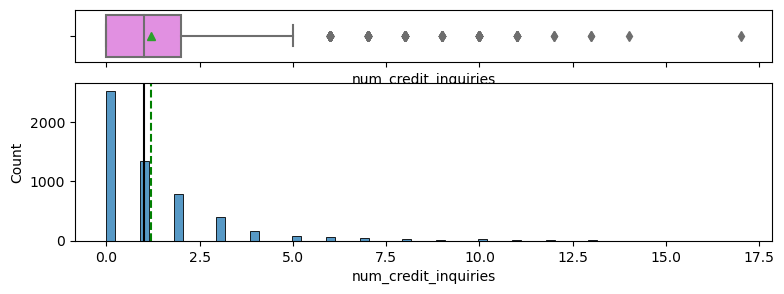

num_credit_lines
Skew : 0.78


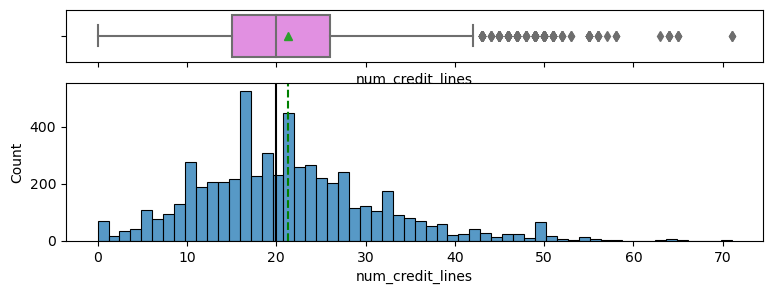

debt_income_ratio
Skew : 2.85


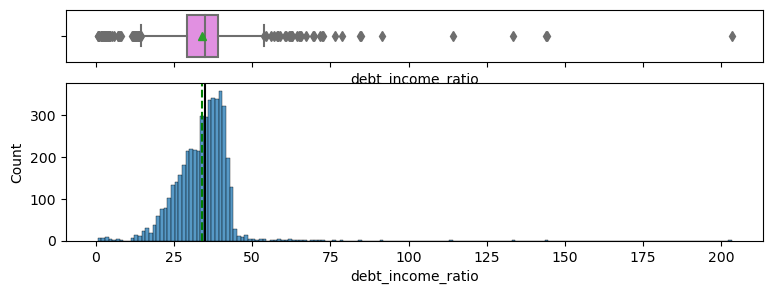

In [13]:
## Analyse the numerical features of the dataset used Boxplot and Histogram.

for col in num_features:

    print(col)    
    print('Skew :',round(data[col].skew(),2))    
    
    histogram_boxplot(data, col)
    
    plt.show()

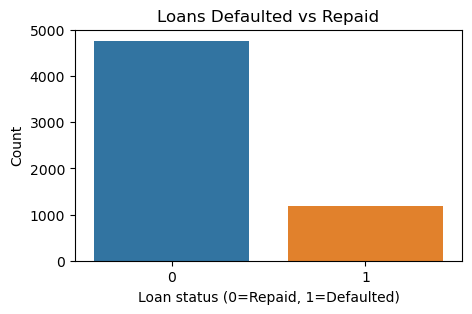

Percentage of Defaults  :  19.95 %
Percent of Loans repaid :  80.05 %


In [14]:
plt.figure(figsize=(5,3))
sns.countplot(x='loan_defaulted',data=data)
plt.xlabel("Loan status (0=Repaid, 1=Defaulted)")
plt.ylabel("Count")
plt.title("Loans Defaulted vs Repaid")
plt.show()
print('Percentage of Defaults  : ',round(len(data[data['loan_defaulted']==1])/len(data['loan_defaulted'])*100,2),"%")
print('Percent of Loans repaid : ',round(len(data[data['loan_defaulted']==0])/len(data['loan_defaulted'])*100,2),"%")

**Insight - Univariate Analysis**
- 20% of the loans are in default
- Target class loan_default is imbalanced
- Numerical variables num_credit_lines, property_value, mortgage_due, debt_to_income_ratio show normal distribution with outliers
- Numerical variables years_on_job, num_of_deliquencies are skewed to the right
- loan_reason and job_type are categorical variables


<a id="bivariate"></a>
**EDA - Bivariate Analysis &emsp;&emsp;&#9195;&ensp;[Exploratory Data Analysis](#eda)**

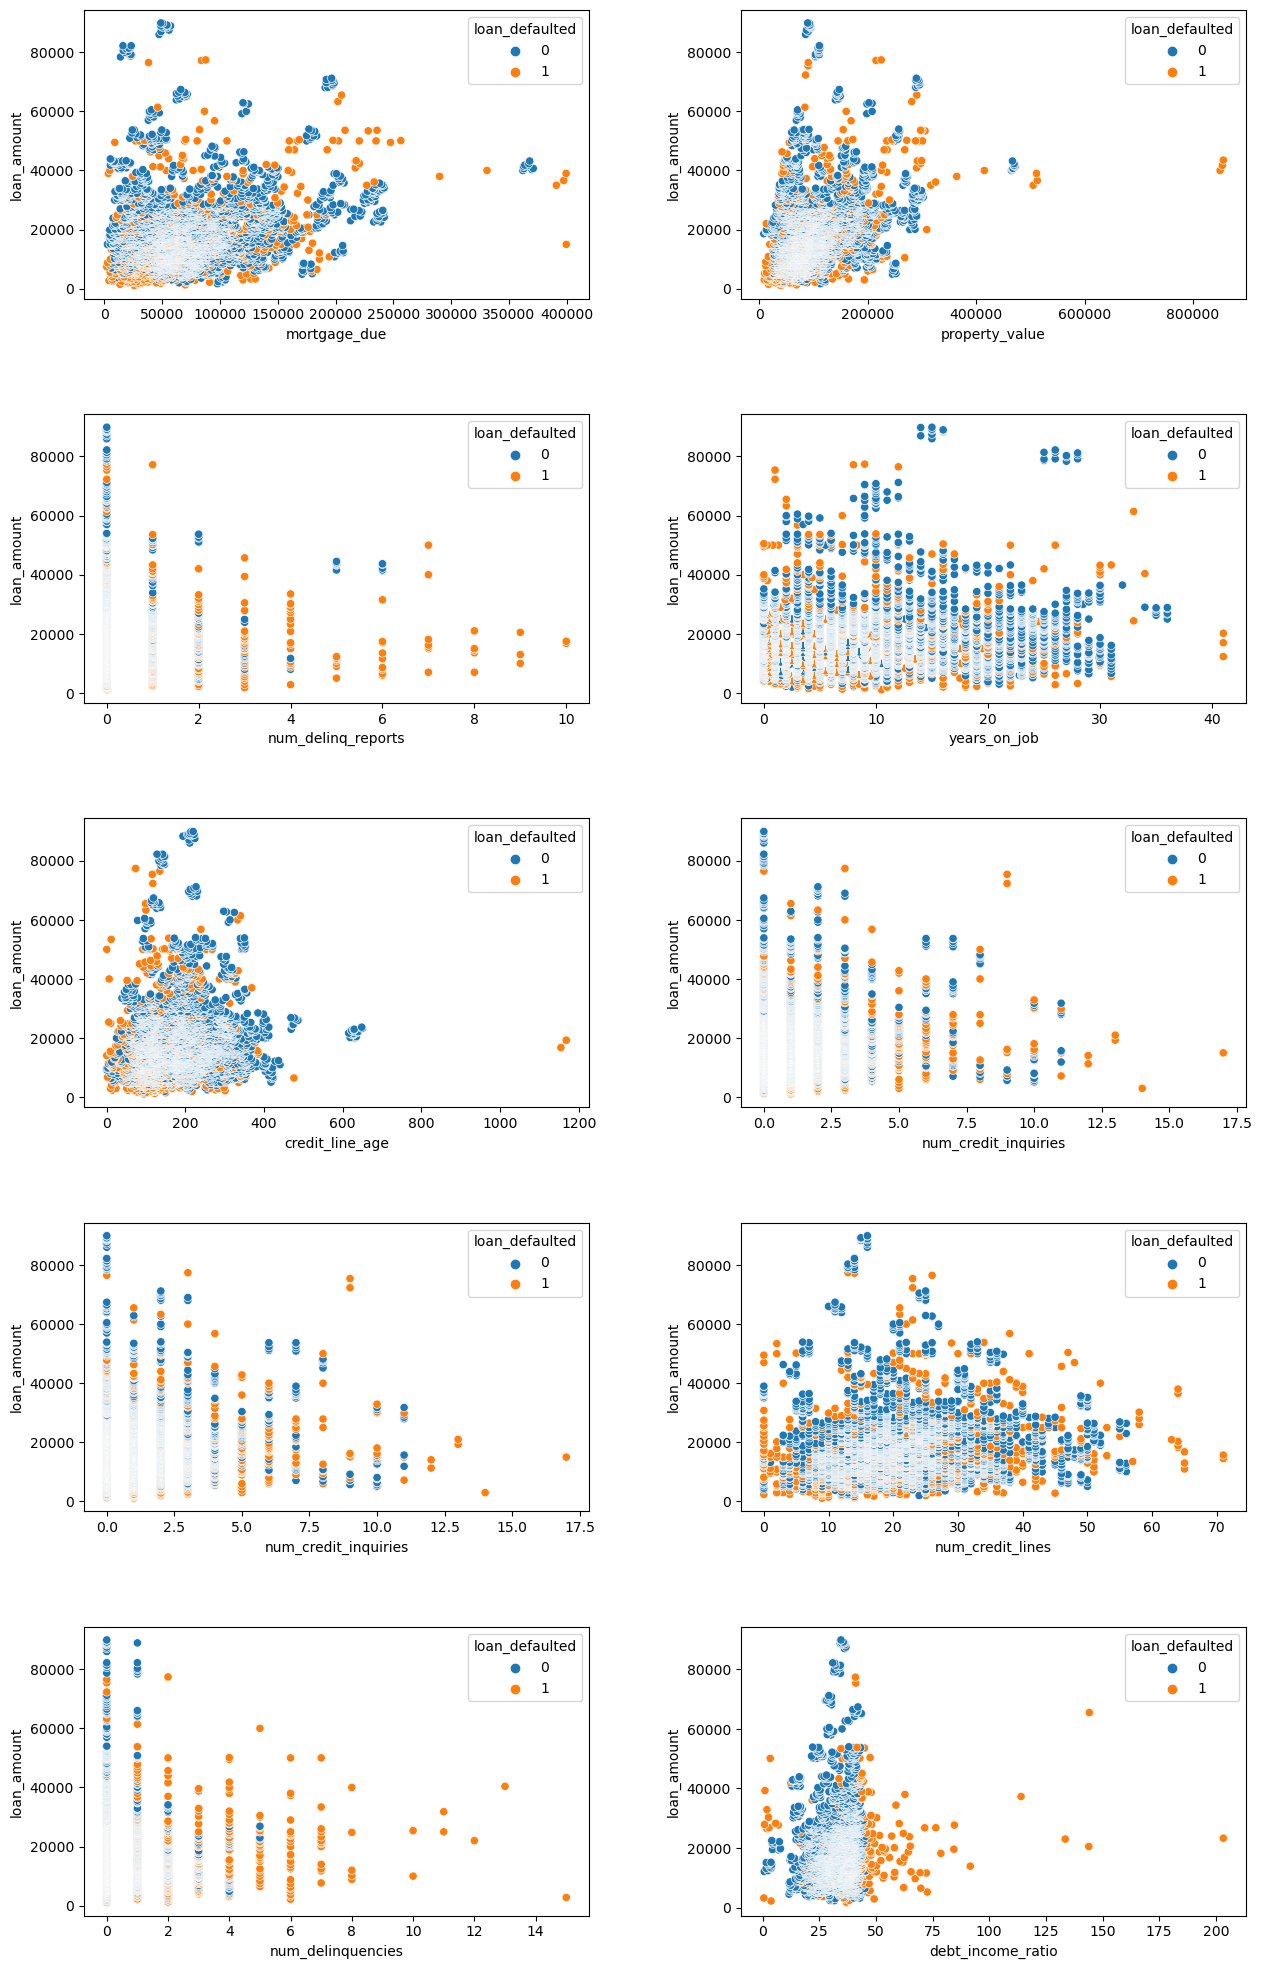

In [15]:
num_features = ['loan_amount', 'mortgage_due', 'years_on_job', 'num_delinq_reports', 'num_delinquencies', 
                'credit_line_age', 'num_credit_inquiries', 'num_credit_lines', 'debt_income_ratio']

fig = plt.figure(figsize = (15, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

ax = fig.add_subplot(6, 2, 1)
sns.scatterplot(data=data, y='loan_amount', x='mortgage_due', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 2)
sns.scatterplot(data=data, y='loan_amount', x='property_value', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 3)
sns.scatterplot(data=data, y='loan_amount', x='num_delinq_reports', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 4)
sns.scatterplot(data=data, y='loan_amount', x='years_on_job', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 5)
sns.scatterplot(data=data, y='loan_amount', x='credit_line_age', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 6)
sns.scatterplot(data=data, y='loan_amount', x='num_credit_inquiries', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 7)
sns.scatterplot(data=data, y='loan_amount', x='num_credit_inquiries', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 8)
sns.scatterplot(data=data, y='loan_amount', x='num_credit_lines', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 9)
sns.scatterplot(data=data, y='loan_amount', x='num_delinquencies', hue='loan_defaulted')

ax = fig.add_subplot(6, 2, 10)
sns.scatterplot(data=data, y='loan_amount', x='debt_income_ratio', hue='loan_defaulted')

plt.show()

**Bivariate Analysis of categorical varibles - Job type and Loan Reason**

In [16]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x, y, title):
    #sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,y,margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,y,normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,4))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.legend(title=title, loc='upper right', bbox_to_anchor=(1.28, 1.0), labels=['Repaid', 'Default'])
    plt.show()

loan_defaulted     0     1   All
job_type                        
Mgr              588   179   767
Office           823   125   948
Other           1834   554  2388
ProfExe         1064   212  1276
Sales             71    38   109
Self             135    58   193
All             4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


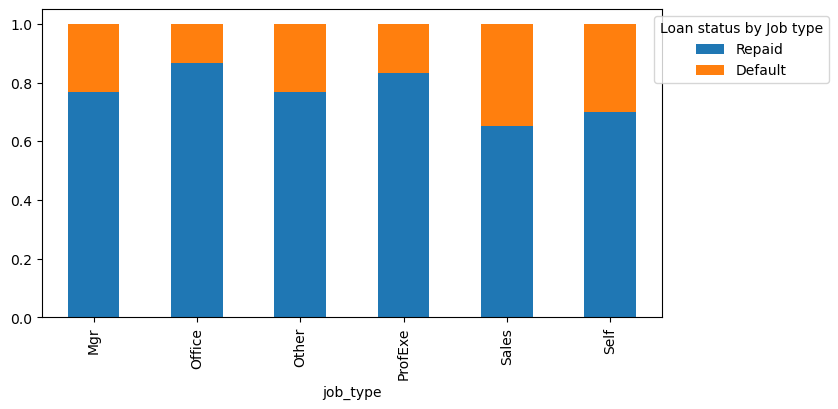

In [17]:
stacked_plot(data["job_type"], data["loan_defaulted"], 'Loan status by Job type')

loan_defaulted     0     1   All
loan_reason                     
DebtCon         3183   745  3928
HomeImp         1384   396  1780
All             4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


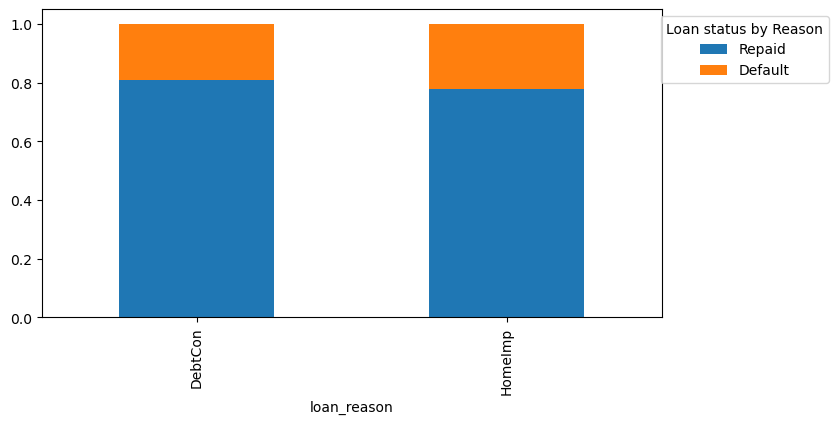

In [18]:
stacked_plot(data["loan_reason"], data["loan_defaulted"], 'Loan status by Reason')

**Insight Bivariate Analysis**
- With respect to loan default
    - Loans default at a higher rate, when
        - debt-to-income ratio is higher than 50
        - num_delenquencies and num_delinq_reports are greater than 3
    - Categorical variables do not show a strong reason for loan_defaults
    - Defaulted loans have a large number of outliers in numerical variables when compared to repaid loans
    - Removing or averaging the outliers will introduce a bias that will negatively impact the model
    - job_type clearly shows variation. Office workers and Professional Execs are less likely to default when compared to Salesperson
    - loan_reason are close to each other. Loan default percentages are: HomeImp = 22%, DebitCon = 19%

<a id="multivariate"></a>
**EDA - Multivariate Analysis &emsp;&emsp;&#9195;&ensp;[Exploratory Data Analysis](#eda)**

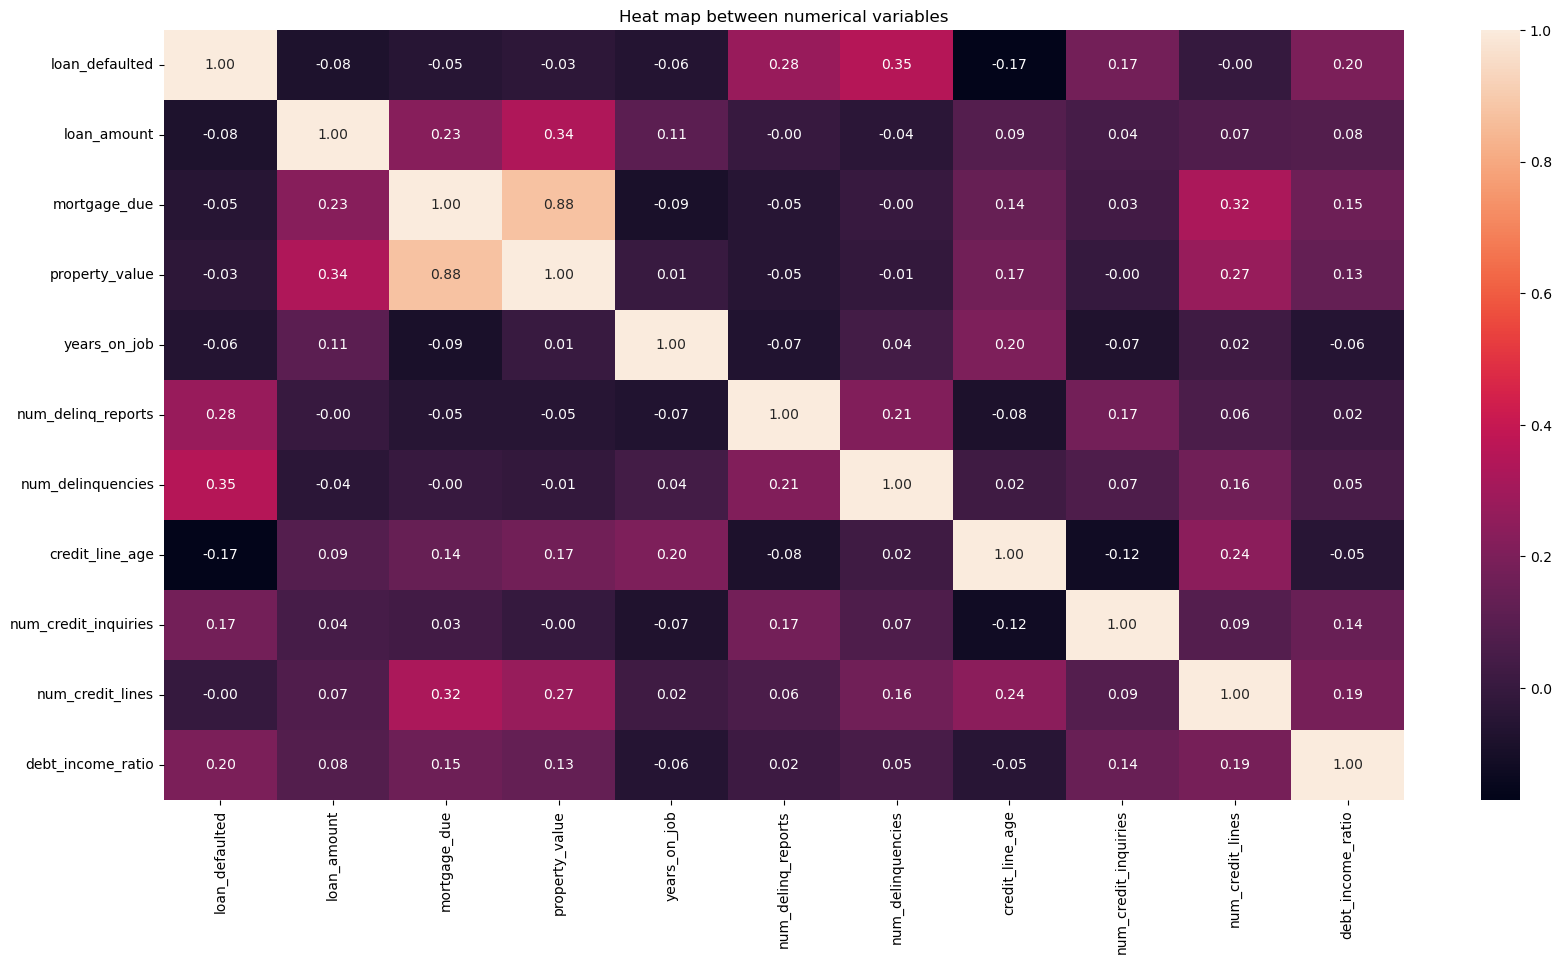

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f")
plt.title("Heat map between numerical variables")
plt.show()

**Insights**
- Mortgage_due and Property_value are correlated and one of them can be dropped.
- Since Mortgage_due has higher number of missing values, let's drop mortgage_due

<Figure size 2500x2000 with 0 Axes>

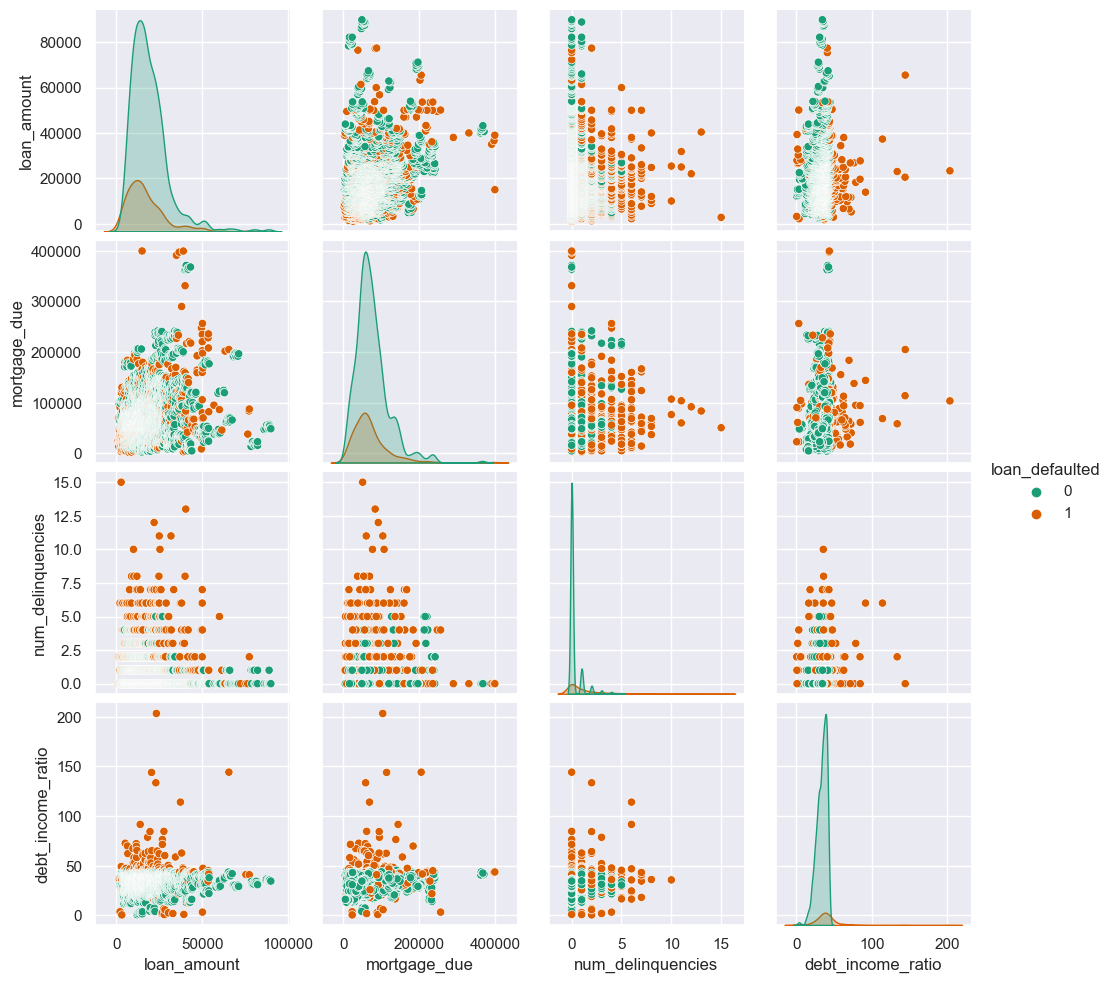

In [20]:
## Pair plot for Multivariate analysis
plt.figure(figsize=(25,20))
sns.set_theme()
sns.pairplot(data, vars=["loan_amount", "mortgage_due", "num_delinquencies","debt_income_ratio"], hue='loan_defaulted',palette='Dark2')
plt.show()

<Figure size 2500x2000 with 0 Axes>

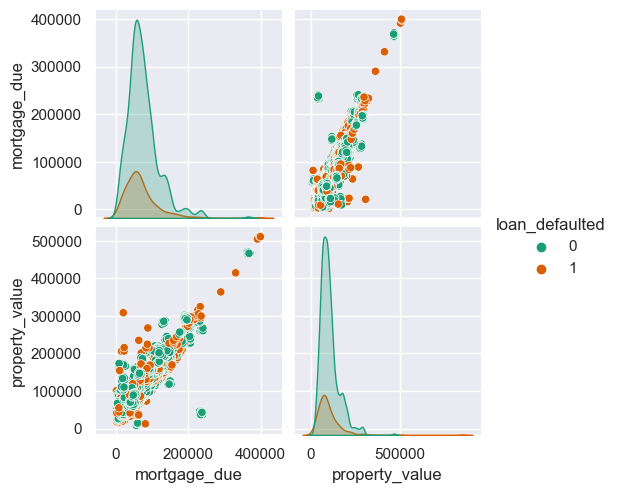

In [21]:
## Pair plot for Multivariate analysis for Mortgage due and Property value

plt.figure(figsize=(25,20))
sns.set_theme()
sns.pairplot(data, vars=["mortgage_due", "property_value"], hue='loan_defaulted',palette='Dark2')
plt.show()

<a id="eda_observations"> </a>
<br>
**Insights - Exploratory Data Analysis**

**Univariate Analysis**
- 20% of the loans are in default
- Target class loan_default is imbalanced
- Numerical variables num_credit_lines, property_value, mortgage_due, debt_to_income_ratio show normal distribution with outliers
- loan_reason and job_type are categorical variables

**Bivariate Analysis**
- With respect to defaults
Categorical variables do not show a strong reason for loan_defaults
    - Defaulted loans have a large number of outliers in numerical variables when compared to repaid loans
    - Removing or averaging the outliers will introduce a bias that will negatively impact the model
    - job_type clearly shows variation. Office workers and Professional Execs are less likely to default when compared to Salesperson
    - loan_reason is close. Not sure if there is a statistical grounds for dropping this feature. Loan default percentages are: HomeImp = 22%, DebitCon = 19%
    
**Multivariate Analysis**
- Mortage_due and Property_value are highly correlated. mortgage_due will not add value to binary classification problem
- Defaulted loans show strong seperation from repaid loans
- If debt_income_ratio exceeds 50, loans show a strong tendency to default regardless of mortgage_due or loan_amount
- Simillarly, when number of deliquencies exceed 2, probability of a loan defaulting increases
- This re-inforces the idea the using mean for removing outliers will introduce negative bias. Scaling numerical variables is a better option

**Action**
- Exclude 'mortgage_due' as a predictor variable from the model

<hr>

<a id="feature_engg"> </a>

&#9194;
**[4. Exploratory Data Analysis](#eda)**
&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[6. Build Models & Score](#models)**
&#9193;


## 5. Data Preparation
<hr>

### Imputation

In [22]:
data.dtypes

loan_defaulted             int64
loan_amount                int64
mortgage_due             float64
property_value           float64
loan_reason             category
job_type                category
years_on_job             float64
num_delinq_reports       float64
num_delinquencies        float64
credit_line_age          float64
num_credit_inquiries     float64
num_credit_lines         float64
debt_income_ratio        float64
dtype: object

In [23]:
## We know that loan default status and Loan amount columns are not nulls input dataset. 
## In addition, if there are atleast 3 other columns that have valid values we are keeping them. This will still require fixing null 
## values

data.drop('mortgage_due', axis=1, inplace=True)
data.dropna(thresh=5, inplace=True)
data.shape

## Checking the shape of the data, we dropped about 102 rows or 2% of the observations

(5869, 12)

In [24]:
target_class = 'loan_defaulted'
#num_features = ['loan_amount', 'property_value', 'years_on_job', 'num_delinq_reports', 'num_delinquencies', 'credit_line_age', 'num_credit_inquiries', 'num_credit_lines', 'debt_income_ratio']
num_features = ['loan_amount', 'property_value', 'years_on_job', 'num_delinq_reports', 'num_delinquencies', 'credit_line_age', 'num_credit_inquiries', 'num_credit_lines']
cat_features = ['job_type']

## Fill missing values
data_num_columns = data[num_features].copy()
data_cat_columns = data[cat_features].copy()

## Filling missing values
## using Median for numeric values
## most_frequent for categorical values

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_imputer.set_output(transform='pandas')
cat_imputer.set_output(transform='pandas')
num_imputer.fit_transform(data_num_columns)
cat_imputer.fit_transform(data_cat_columns)

## Scale data numeric data and add dummies to 

data_fixed = pd.concat(
        [
            data[target_class],
            pd.concat( 
                [num_imputer.fit_transform(data_num_columns), cat_imputer.fit_transform(data_cat_columns)], axis=1)], 
        axis=1)

data_fixed = pd.get_dummies(data_fixed)

In [25]:
##Split train and test data

X,y = data_fixed.drop(['loan_defaulted'],axis = 1) , data_fixed['loan_defaulted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
## Get count of null values for each column after applying IterativeImputer()

#data_trans.isnull().sum().sort_values(ascending=False) ## Another way to get missing values

NA = pd.DataFrame(data=[data_fixed.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (data_fixed.isna().sum()/data_fixed.shape[0]*100).tolist()]], 
           columns=data_fixed.columns, index=['NaN Count', 'NaN Percent']).transpose()

NA.style.background_gradient(cmap="Blues", subset=['NaN Count'])

## We can see all null values are fixed


,NaN Count,NaN Percent
loan_defaulted,0,0.00%
loan_amount,0,0.00%
property_value,0,0.00%
years_on_job,0,0.00%
num_delinq_reports,0,0.00%
num_delinquencies,0,0.00%
credit_line_age,0,0.00%
num_credit_inquiries,0,0.00%
num_credit_lines,0,0.00%
job_type_Mgr,0,0.00%


**Insights**
- Dropped rows that have more than 5 predictors are null values. Approximately 100 rows or 2%.
- Used SimpleImputer(). 'Median' for numeric values, 'frequent' for categorical values
- Excluding mortgage_due as it has a high number of null values and highly correlated with property_


<br>
<a id="models"> </a>

&#9194;
**[5. Data Preprocessing](#feature_engg)**
&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[7. HyperParameters Tuning](#hyperparameter)**
&#9193;

## 6. Build Models and Score
<hr>

<a id="logistic_regression"></a>

**LogisticRegression - Model, Predict and Score &emsp;&emsp;&emsp;&#9195;&ensp;[Build Models and Score](#models)**

[Logistic Regression](#logistic_regression)
&ensp;&#9679;&ensp;
[Decision Tree Classification](#decision_tree)
&ensp;&#9679;&ensp;
[RandomForest Classification](#RandomForest)
&ensp;&#9679;&ensp;
[Bagging Classification](#BaggingClassifier)
&ensp;&#9679;&ensp;
[AdaBoostClassifier Classification](#AdaBoostClassifier)
&ensp;&#9679;&ensp;
[XGBoost Classification](#XGBoostClassifier)
&ensp;&#9679;&ensp;
[HistGradientBoosting Classification](#HistGradientBoostingClassifier)



Train AUC: 0.768, Train Precison: 0.4465, Train Recall: 0.6416, Train F1 : 0.5266 

Logistic Regression  - AUC: 0.77

Logistic Regression  Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1407
           1       0.43      0.63      0.51       354

    accuracy                           0.76      1761
   macro avg       0.66      0.71      0.68      1761
weighted avg       0.80      0.76      0.77      1761

Best Threshold=0.196875, G-Mean=0.713


<Figure size 1200x600 with 0 Axes>

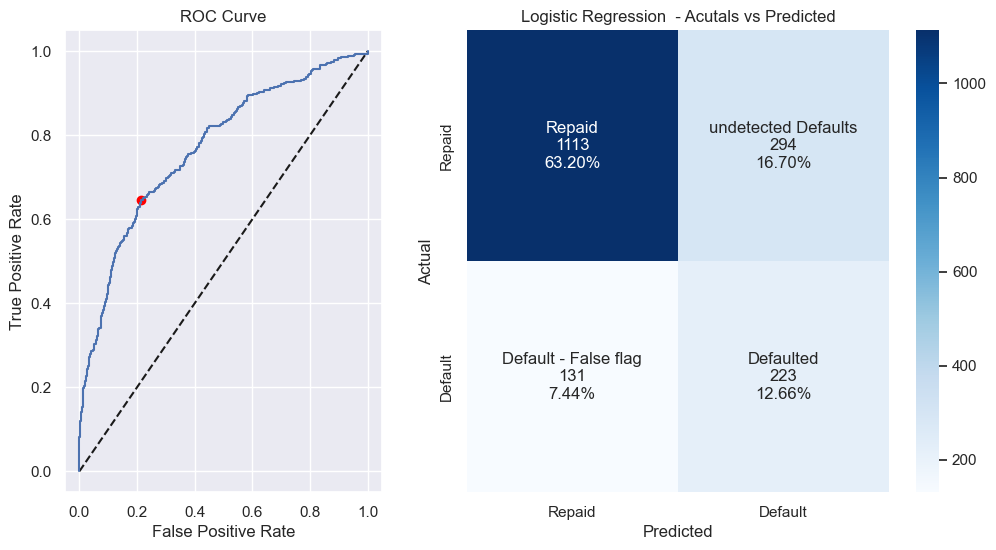

In [27]:
## Logistic Regression

lr_classifier = LogisticRegression(solver='newton-cholesky', class_weight='balanced', max_iter=50, random_state=42)

# Fit the RandomForest model to the selected features
lr_classifier.fit(X_train, y_train)
# Make predictions on the test data
predictions = lr_classifier.predict(X_test)

## Train scores
train_acc = lr_classifier.score(X_train,y_train).round(4)
pred_train = lr_classifier.predict(X_train).round(4)
y_scores_train = lr_classifier.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

## Test Scores
y_scores = lr_classifier.predict_proba(X_test)  # Score predictions
metrics_score2("Logistic Regression ", y_test, predictions, y_scores)    # Print metrics

In [28]:
confusion_matrix(y_test, predictions)

array([[1113,  294],
       [ 131,  223]], dtype=int64)

**Insights - LogisticRegression**
- Yes, we can use machine learning to detect Loan defaults
- Using default values, Logistic Regression performs well and offers insights.
- We can use these metrics as baseline metrics to find better performing models

<a id="decision_tree"></a>

**DecisionTree - Model, Predict and Score &emsp;&emsp;&emsp;&#9195;&ensp;[Build Models and Score](#models)**

[Classification Modelling process](#modelling_process)
&ensp;&#9679;&ensp;
[Logistic Regression](#logistic_regression)
&ensp;&#9679;&ensp;
[Decision Tree Classification](#decision_tree)
&ensp;&#9679;&ensp;
[RandomForest Classification](#RandomForest)
&ensp;&#9679;&ensp;
[Bagging Classification](#BaggingClassifier)
&ensp;&#9679;&ensp;
[AdaBoostClassifier Classification](#AdaBoostClassifier)
&ensp;&#9679;&ensp;
[XGBoost Classification](#XGBoostClassifier)
&ensp;&#9679;&ensp;
[HistGradientBoosting Classification](#HistGradientBoostingClassifier)



AUC: 0.8143, Precison: 0.5232, Recall: 0.8584, F1 : 0.6502 

DecisionTree Classifier - AUC: 0.8

DecisionTree Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1407
           1       0.40      0.69      0.50       354

    accuracy                           0.73      1761
   macro avg       0.65      0.71      0.66      1761
weighted avg       0.80      0.73      0.75      1761

Best Threshold=0.832403, G-Mean=0.729


<Figure size 1200x600 with 0 Axes>

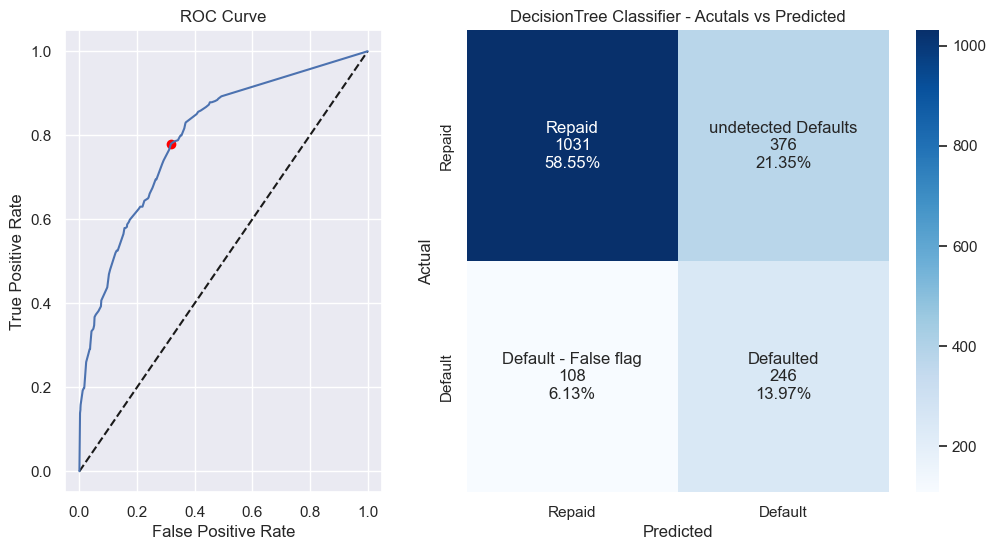

In [72]:
dt_classifier = DecisionTreeClassifier(class_weight="balanced", 
                                       max_depth=25, 
                                       min_samples_split=10, 
                                       min_samples_leaf=10, 
                                       max_features=3, 
                                       random_state=42)

# Fit the RandomForest model to the selected features
dt_classifier.fit(X_train, y_train)

## Train scores
train_acc = dt_classifier.score(X_train,y_train).round(4)
pred_train = dt_classifier.predict(X_train).round(4)
y_scores_train = dt_classifier.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"AUC: {train_acc}, Precison: {train_precision}, Recall: {train_recall}, F1 : {train_f1} \n")

# Make predictions on the test data
predictions = dt_classifier.predict(X_test)
y_scores = dt_classifier.predict_proba(X_test)  # Score predictions
metrics_score2("DecisionTree Classifier", y_test, predictions, y_scores)    # Print metrics

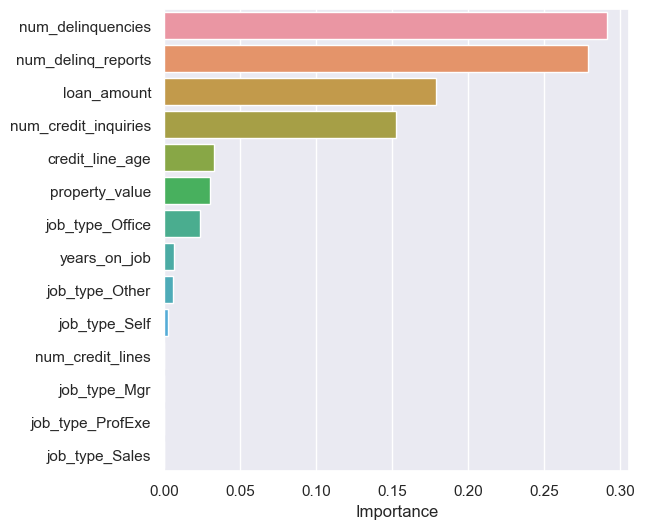

                      Importance
num_delinquencies       0.291337
num_delinq_reports      0.278410
loan_amount             0.178506
num_credit_inquiries    0.152091
credit_line_age         0.032400
property_value          0.029770
job_type_Office         0.023523
years_on_job            0.006447
job_type_Other          0.005392
job_type_Self           0.002125
num_credit_lines        0.000000
job_type_Mgr            0.000000
job_type_ProfExe        0.000000
job_type_Sales          0.000000


In [30]:
# Plotting the feature importance for the best RandomForest model found using GridSearch
importances = dt_classifier.feature_importances_
#features = rf_gs_classifier.get_feature_names_out();
importance_df = pd.DataFrame(importances, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
plt.figure(figsize=(6,6));
sns.barplot(importance_df.Importance, importance_df.index)
plt.show()

print(importance_df)

**Insights - DecisionTree**
- We are seeing improved performance compared to LogisticRegression. F1 score and Recall have improved significantly
- DecisionTree is explainable - number of delequencies has the highest importance.
- Using GridSearch we can find optimal values

<a id="RandomForest"></a>
**RandomForest Classifier - Model, Predict and Score &emsp;&emsp;&emsp;&#9195;&ensp;[Build Models and Score](#models)**

[Classification Modelling process](#modelling_process)
&ensp;&#9679;&ensp;
[Logistic Regression](#logistic_regression)
&ensp;&#9679;&ensp;
[Decision Tree Classification](#decision_tree)
&ensp;&#9679;&ensp;
[RandomForest Classification](#RandomForest)
&ensp;&#9679;&ensp;
[Bagging Classification](#BaggingClassifier)
&ensp;&#9679;&ensp;
[AdaBoostClassifier Classification](#AdaBoostClassifier)
&ensp;&#9679;&ensp;
[XGBoost Classification](#XGBoostClassifier)
&ensp;&#9679;&ensp;
[HistGradientBoosting Classification](#HistGradientBoostingClassifier)


Train AUC: 1.0, Train Precison: 1.0, Train Recall: 1.0, Train F1 : 1.0 

RandomForset Classifier - AUC: 0.96

RandomForset Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1407
           1       0.95      0.64      0.77       354

    accuracy                           0.92      1761
   macro avg       0.94      0.82      0.86      1761
weighted avg       0.92      0.92      0.92      1761

Best Threshold=0.680000, G-Mean=0.908


<Figure size 1200x600 with 0 Axes>

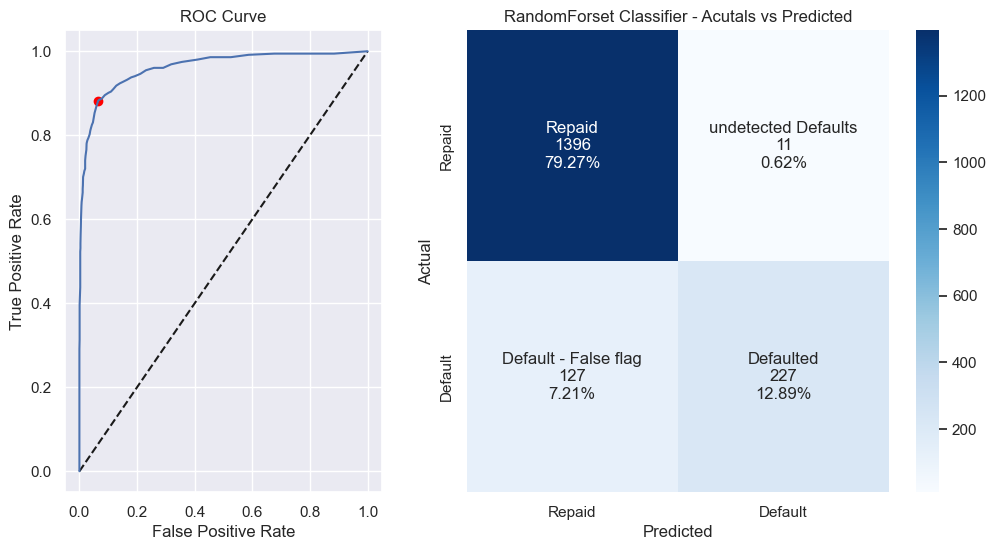

In [31]:
rf_classifier = RandomForestClassifier(
            random_state = 42)

# Fit the RandomForest model to the selected features
rf_classifier.fit(X_train, y_train)
# Make predictions on the test data

## Train scores
train_acc = rf_classifier.score(X_train,y_train).round(4)
pred_train = rf_classifier.predict(X_train).round(4)
y_scores_train = rf_classifier.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

predictions = rf_classifier.predict(X_test)
y_scores = rf_classifier.predict_proba(X_test)  # Score predictions
metrics_score2("RandomForset Classifier", y_test, predictions, y_scores)    # Print metrics

**Insights - RandomForest**

- We are seeing improving performance. F1 score and Recall have improved significantly
- Training scores of 1.0 is a classic case of overfitting. 
- This model performs well on test data. Test data scores are better than DecisionTree and Logistic Regression
- Using GridSearch we can find optimal values


<a id="BaggingClassifier"></a>

**Bagging Classification &emsp;&emsp;&emsp;&#9195;&ensp;[Build Models and Score](#models)**

[Classification Modelling process](#modelling_process)
&ensp;&#9679;&ensp;
[Logistic Regression](#logistic_regression)
&ensp;&#9679;&ensp;
[Decision Tree Classification](#decision_tree)
&ensp;&#9679;&ensp;
[RandomForest Classification](#RandomForest)
&ensp;&#9679;&ensp;
[Bagging Classification](#BaggingClassifier)
&ensp;&#9679;&ensp;
[AdaBoostClassifier Classification](#AdaBoostClassifier)
&ensp;&#9679;&ensp;
[XGBoost Classification](#XGBoostClassifier)
&ensp;&#9679;&ensp;
[HistGradientBoosting Classification](#HistGradientBoostingClassifier)


Train AUC: 0.8123, Train Precison: 0.5234, Train Recall: 0.7433, Train F1 : 0.6143 

Bagging Classifier - AUC: 0.82

Bagging Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1407
           1       0.48      0.71      0.57       354

    accuracy                           0.79      1761
   macro avg       0.70      0.76      0.71      1761
weighted avg       0.83      0.79      0.80      1761

Best Threshold=0.248914, G-Mean=0.757


<Figure size 1200x600 with 0 Axes>

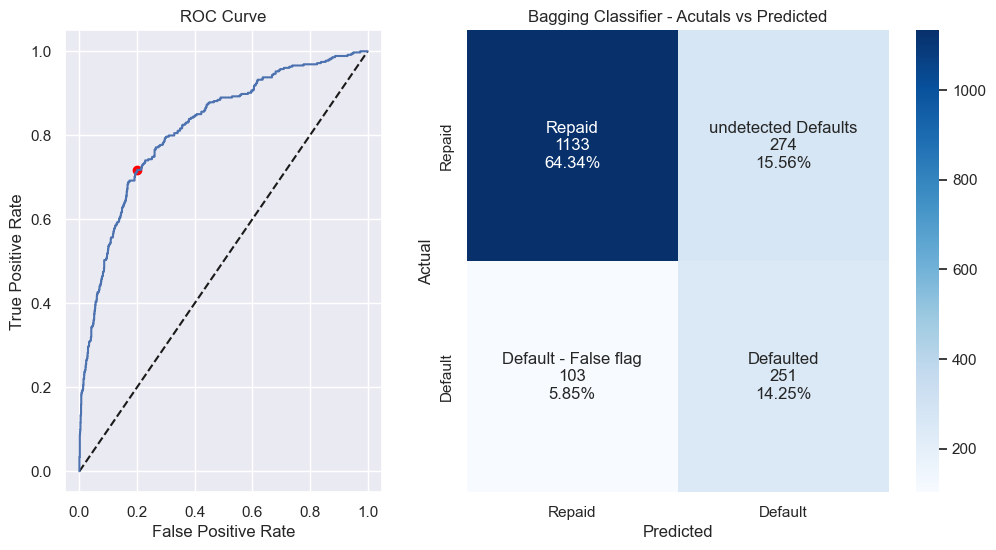

In [32]:
base_classifier = DecisionTreeClassifier(class_weight="balanced", 
                                       max_depth=5, 
                                       min_samples_split=10, 
                                       min_samples_leaf=5, 
                                       max_features=3, 
                                       random_state=42)

bg_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)

# Fit the RandomForest model to the selected features
bg_classifier.fit(X_train, y_train)
# Make predictions on the test data

## Train scores
train_acc = bg_classifier.score(X_train,y_train).round(4)
pred_train = bg_classifier.predict(X_train).round(4)
y_scores_train = bg_classifier.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

predictions = bg_classifier.predict(X_test)
y_scores = bg_classifier.predict_proba(X_test)  # Score predictions
metrics_score2("Bagging Classifier", y_test, predictions, y_scores)    # Print metrics

**Insights Bagging Classification**

- Performance is very simillar to LogisticRegression
- Train and Test scores are close to each other
- There isn't overfitting as we saw in RandomForest alogorithm
- Bagging performs better than DecisionTree. It uses Bootstrap sampling as opposed to a single DecisionTree

<a id="AdaBoostClassifier"></a>

**AdaBoost Classification &emsp;&emsp;&emsp;&#9195;&ensp;[Build Models and Score](#models)**

[Classification Modelling process](#modelling_process)
&ensp;&#9679;&ensp;
[Logistic Regression](#logistic_regression)
&ensp;&#9679;&ensp;
[Decision Tree Classification](#decision_tree)
&ensp;&#9679;&ensp;
[RandomForest Classification](#RandomForest)
&ensp;&#9679;&ensp;
[Bagging Classification](#BaggingClassifier)
&ensp;&#9679;&ensp;
[AdaBoostClassifier Classification](#AdaBoostClassifier)
&ensp;&#9679;&ensp;
[XGBoost Classification](#XGBoostClassifier)
&ensp;&#9679;&ensp;
[HistGradientBoosting Classification](#HistGradientBoostingClassifier)


Train AUC: 0.8793, Train Precison: 0.6548, Train Recall: 0.845, Train F1 : 0.7378 

AdaBoost Classifier - AUC: 0.84

AdaBoost Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1407
           1       0.51      0.68      0.58       354

    accuracy                           0.80      1761
   macro avg       0.71      0.76      0.73      1761
weighted avg       0.83      0.80      0.81      1761

Best Threshold=0.488871, G-Mean=0.761


<Figure size 1200x600 with 0 Axes>

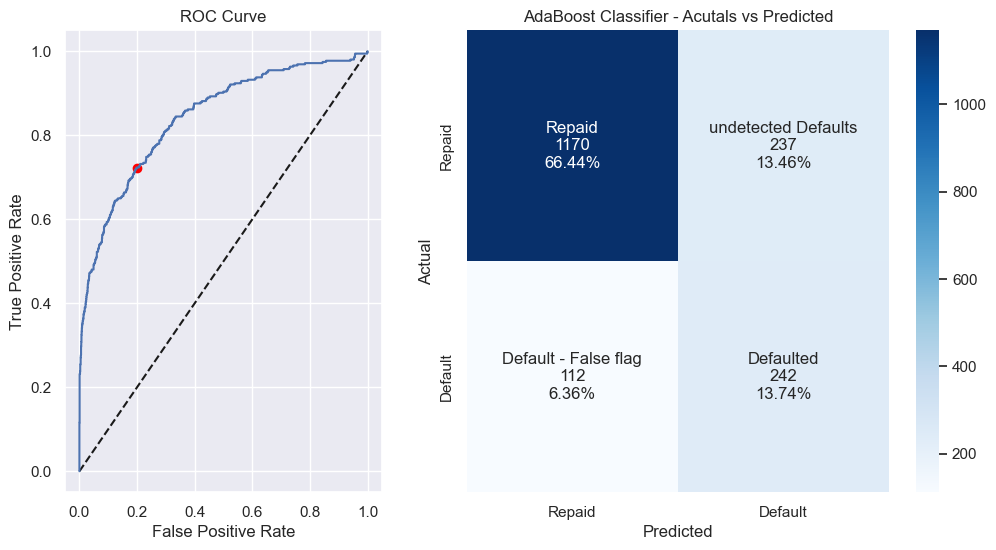

In [33]:
base_classifier = DecisionTreeClassifier(class_weight="balanced", 
                                       max_depth=2,  # Weak learner
                                       min_samples_split=10, 
                                       min_samples_leaf=5, 
                                       max_features=3, 
                                       random_state=42)

ada_classifier = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=42)

# Fit the RandomForest model to the selected features
ada_classifier.fit(X_train, y_train)
# Make predictions on the test data

## Train scores
train_acc = ada_classifier.score(X_train,y_train).round(4)
pred_train = ada_classifier.predict(X_train).round(4)
y_scores_train = ada_classifier.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

predictions = ada_classifier.predict(X_test)
y_scores = ada_classifier.predict_proba(X_test)  # Score predictions
metrics_score2("AdaBoost Classifier", y_test, predictions, y_scores)    # Print metrics

**Insights AdaBoost**

- In AdaBoost is an Ensemble alogrithm. The base algorithm, DecisionTree is tweaked iteratively to focus on areas where it predicts incorrectly. As a result, Adaboost typically provides more accurate predictions than Random Forest. 
- We can see that AdaBoost is not overfitting as in the case RandomForest where the Training scores were 1.0
- The performance metrics between Train and Test scores are close

<a id="XGBoostClassifier"></a>

**XGBoostClassifier Classification &emsp;&emsp;&emsp;&#9195;&ensp;[Build Models and Score](#models)**

[Classification Modelling process](#modelling_process)
&ensp;&#9679;&ensp;
[Logistic Regression](#logistic_regression)
&ensp;&#9679;&ensp;
[Decision Tree Classification](#decision_tree)
&ensp;&#9679;&ensp;
[RandomForest Classification](#RandomForest)
&ensp;&#9679;&ensp;
[Bagging Classification](#BaggingClassifier)
&ensp;&#9679;&ensp;
[AdaBoostClassifier Classification](#AdaBoostClassifier)
&ensp;&#9679;&ensp;
[XGBoost Classification](#XGBoostClassifier)
&ensp;&#9679;&ensp;
[HistGradientBoosting Classification](#HistGradientBoostingClassifier)


Train AUC: 0.9691, Train Precison: 0.9861, Train Recall: 0.8584, Train F1 : 0.9178 

XGBoost Classifier - AUC: 0.89

XGBoost Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1407
           1       0.83      0.54      0.66       354

    accuracy                           0.89      1761
   macro avg       0.86      0.76      0.79      1761
weighted avg       0.88      0.89      0.88      1761

Best Threshold=0.173211, G-Mean=0.822


<Figure size 1200x600 with 0 Axes>

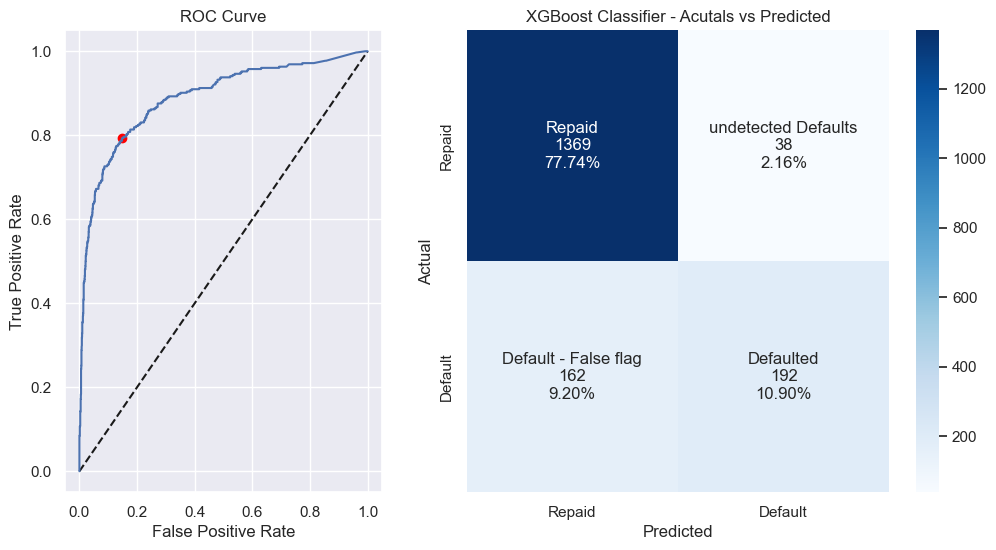

In [34]:


# Train the XGBoost model
xgb = XGBClassifier(n_estimators=25, max_depth=20, learning_rate=0.05, objective='binary:logistic')
# fit model
xgb.fit(X_train, y_train)


## Train scores
train_acc = xgb.score(X_train,y_train).round(4)
pred_train = xgb.predict(X_train).round(4)
y_scores_train = xgb.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

# Make predictions on the test data
predictions = xgb.predict(X_test)

y_scores = xgb.predict_proba(X_test)  # Score predictions
metrics_score2("XGBoost Classifier", y_test, predictions, y_scores)    # Print metrics

**Insights XGABoost**

- XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.
- It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.
- Scores 
    - Accuracy - Train/Test  => 0.97 /0.87
    - Precision - Train/Test  => 0.97/0.84
    - We can see Train and Test scores are close when compared to DecisionTree algorithm.


<a id="HistGradientBoostingClassifier"></a>

**HistGradientBoosting Classification &emsp;&emsp;&emsp;&#9195;&ensp;[Build Models and Score](#models)**

[Classification Modelling process](#modelling_process)
&ensp;&#9679;&ensp;
[Logistic Regression](#logistic_regression)
&ensp;&#9679;&ensp;
[Decision Tree Classification](#decision_tree)
&ensp;&#9679;&ensp;
[RandomForest Classification](#RandomForest)
&ensp;&#9679;&ensp;
[Bagging Classification](#BaggingClassifier)
&ensp;&#9679;&ensp;
[AdaBoostClassifier Classification](#AdaBoostClassifier)
&ensp;&#9679;&ensp;
[XGBoost Classification](#XGBoostClassifier)
&ensp;&#9679;&ensp;
[HistGradientBoosting Classification](#HistGradientBoostingClassifier)


Train AUC: 0.9698, Train Precison: 0.9958, Train Recall: 0.8535, Train F1 : 0.9192 

HistGradientBoosting Classifier - AUC: 0.93

HistGradientBoosting Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1407
           1       0.92      0.60      0.73       354

    accuracy                           0.91      1761
   macro avg       0.91      0.79      0.84      1761
weighted avg       0.91      0.91      0.90      1761

Best Threshold=0.007949, G-Mean=0.869


<Figure size 1200x600 with 0 Axes>

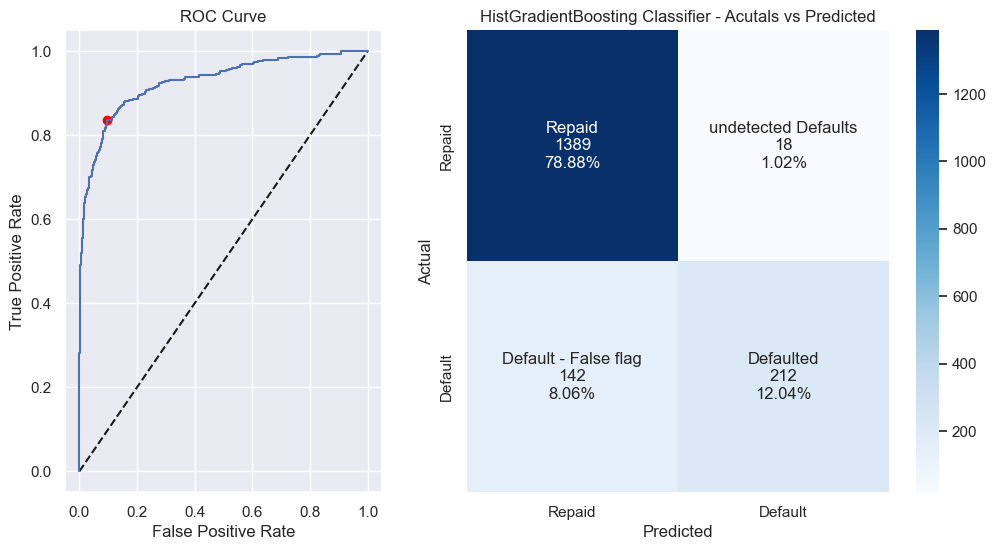

In [35]:

hgb_classifier = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_iter=200, random_state=42)

# Fit the HistGradientBoostingClassifier moHistGradientBoostingClassifierdel to the selected features
hgb_classifier.fit(X_train, y_train)
# Make predictions on the test data

## Train scores
train_acc = hgb_classifier.score(X_train,y_train).round(4)
pred_train = hgb_classifier.predict(X_train).round(4)
y_scores_train = hgb_classifier.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

predictions = hgb_classifier.predict(X_test)
y_scores = hgb_classifier.predict_proba(X_test)  # Score predictions
metrics_score2("HistGradientBoosting Classifier", y_test, predictions, y_scores)    # Print metrics

**Insights - Histogram-Based Gradient Boosting**

- Histogram-Based Gradient Boosting is an ensemble of decision trees algorithms.
- Major problem with Graident boosting algorithms is that it is slow to train the model. This is particularly a problem when using the model on large datasets with tens of thousands of examples (rows).
- A another option is discretize (binning) the continuous input variables to a few hundred unique values. This increases execution performance
- In the Performance report section of this notebook, we can see that the scores are simillar across Accuracy, Precision and F1 for both Train and Test dataset.


<a id="hyperparameter"></a>

&#9194;
**[6. Models Build & Score](#models)**
&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[8. Stacked Classification](#stacked_classification)**
&#9193;


## 7. Hyperparameter Tuning
<hr>

[RandomForest Hyperparameter](#rf_hyperparm)
&ensp;&#9679;&ensp;
[RandomForest Tuning with Class weights](#rf_weights)
&ensp;&#9679;&ensp;
[Hyperparameter Tuning](#hyperparameter)

**Insights - DecisionTree using Hyperparameters**
- Using GridSearch we discovered optimal parameters to improve performance over default values
    - Best parameters for DecisionTree Classifier :
        - criterion: 'entropy', max_depth: 35, min_samples_leaf: 3
- ROC curve goes higher on TP axis, when compared to DecisionTree with default values

<a id="rf_hyperparm"></a>
### RandomForest Hyperparameter Tuning
<hr>

[RandomForest Hyperparameter](#rf_hyperparm)
&ensp;&#9679;&ensp;
[RandomForest Tuning with Class weights](#rf_weights)
&ensp;&#9679;&ensp;
[Hyperparameter Tuning](#hyperparameter)

In [36]:
# Create the parameter grid based on the results of random search 

rf_gs_classifier = RandomForestClassifier()

rf_hyperparms = dict( 
        n_estimators = [25, 50, 75, 100],
        max_depth = [9, 11, 13],
        ccp_alpha= [0.001, 0.005, 0.01],
        max_features = [None, 'sqrt', 'log2'],
        criterion = ['gini', 'entropy']
                    )

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_grid_search = GridSearchCV(rf_gs_classifier, rf_hyperparms, cv=folds, n_jobs=-1, verbose=1, scoring = "f1")

rf_grid_search.fit(X_train, y_train)
rf_best = rf_grid_search.best_estimator_
rf_best

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=13,
                       max_features=None, n_estimators=50)

In [37]:
print("Best parameters for RandomForest Classifier - GridSearch :")
rf_grid_search.best_params_

Best parameters for RandomForest Classifier - GridSearch :


{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 13,
 'max_features': None,
 'n_estimators': 50}

Train AUC: 0.962, Train Precison: 0.9985, Train Recall: 0.8123, Train F1 : 0.8959 

Random Forest - GridSearch - AUC: 0.92

Random Forest - GridSearch Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1407
           1       0.90      0.51      0.65       354

    accuracy                           0.89      1761
   macro avg       0.89      0.75      0.79      1761
weighted avg       0.89      0.89      0.88      1761

Best Threshold=0.010429, G-Mean=0.855


<Figure size 1200x600 with 0 Axes>

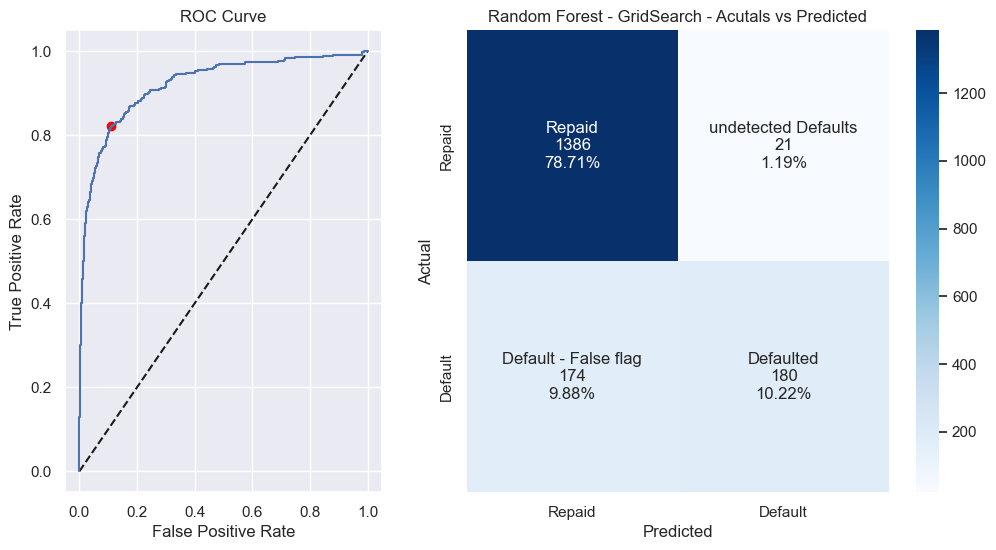

In [38]:
## Let's score

## Train scores
train_acc = rf_best.score(X_train,y_train).round(4)
pred_train = rf_best.predict(X_train).round(4)
y_scores_train = rf_best.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

rf_best_prediction = rf_best.predict(X_test)   # Predict
y_scores = rf_best.predict_proba(X_test)  # Score predictions
metrics_score2("Random Forest - GridSearch", y_test, rf_best_prediction,  y_scores)    # Print metrics

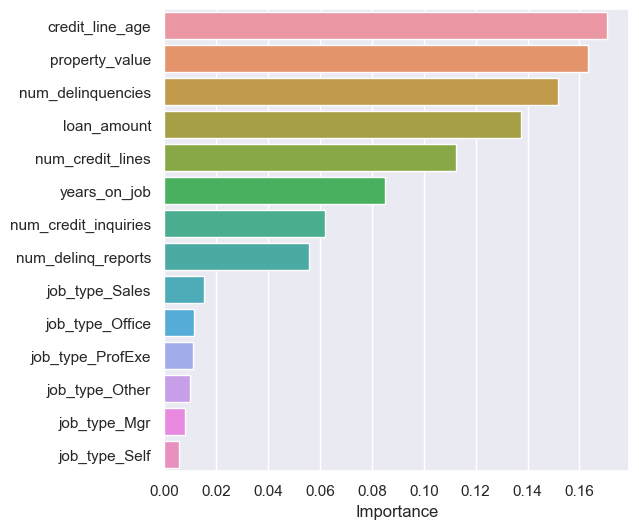

                      Importance
credit_line_age         0.170741
property_value          0.163407
num_delinquencies       0.151667
loan_amount             0.137398
num_credit_lines        0.112485
years_on_job            0.085052
num_credit_inquiries    0.061898
num_delinq_reports      0.055891
job_type_Sales          0.015383
job_type_Office         0.011551
job_type_ProfExe        0.011180
job_type_Other          0.009667
job_type_Mgr            0.008086
job_type_Self           0.005595


In [39]:
import warnings;
warnings.filterwarnings('ignore')

# Plotting the feature importance for the best RandomForest model found using GridSearch
importances = rf_best.feature_importances_
#features = rf_gs_classifier.get_feature_names_out();
importance_df = pd.DataFrame(importances, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
plt.figure(figsize=(6,6));
sns.barplot(importance_df.Importance, importance_df.index)
plt.show()

print(importance_df)

**Insights Random Forest using Grid Search**
- This section we tried, fitting 5 folds of training for each of 216 candidates, totalling 1080 fits
- We tried different comninations of these parameters, this gave us 216 possible candidates
        n_estimators = [25, 50, 75, 100],
        max_depth = [9, 11, 13],
        ccp_alpha= [0.001, 0.005, 0.01],
        max_features = [None, 'sqrt', 'log2'],
        criterion = ['gini', 'entropy']
- Grid search gave us as the best parameters to use for RandomForest algorithm
        {'ccp_alpha': 0.001,
         'criterion': 'entropy',
         'max_depth': 13,
         'max_features': None,
         'n_estimators': 50}
- Feature importance point of view, property-value, number-of-credit-lines and number-of-deliquencies were the top three independent variables. In our previous DecisionTree algorithm, number-of-deliquencies was the most important criteria
- RandomForest with the best paramters does not overfit when compared to RandomForest with default parameters


<a id="rf_weights"></a>
### RandomForest Tuning with Class weights
<hr>

**[RandomForest Hyperparameter](#rf_hyperparm)**
&ensp;&#9679;&ensp;
**[RandomForest Tuning with Class weights](#rf_weights)**
&ensp;&#9679;&ensp;
**[Hyperparameter Tuning](#hyperparameter)**

In [40]:


# Grid search we found that 50 estimators, max_depth=9, max_features=9, criterion=gini
# Let's find the optimal class weight since or target class is imblanced

weights = np.linspace(0.1,0.99,50)

cw_param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

rf_cw_classifier = RandomForestClassifier( 
                       n_estimators=50, 
                       max_depth=9, 
                       max_features=9, 
                       criterion='gini')


folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_gs_cw_pipeline = GridSearchCV(rf_cw_classifier, cw_param_grid, cv=folds, n_jobs=-1, verbose=1, scoring = "f1")

rf_gs_cw_pipeline.fit(X_train, y_train)
rf_cw_best = rf_gs_cw_pipeline.best_estimator_


Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [41]:
rf_cw_best = rf_gs_cw_pipeline.best_estimator_

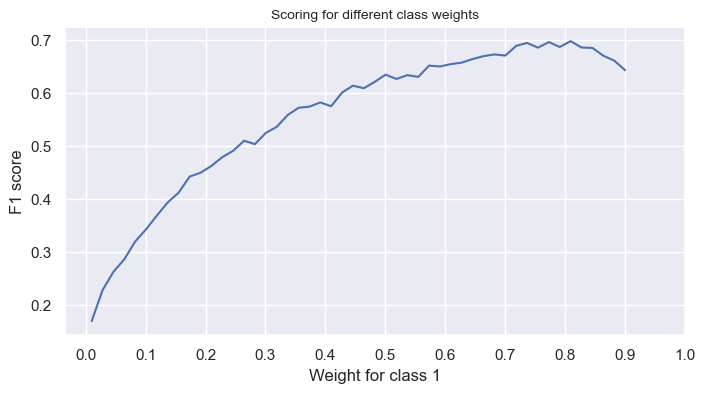

Best class weights for RandomForest Classifier :


{'class_weight': {0: 0.19081632653061226, 1: 0.8091836734693878}}

In [42]:
#Ploting the score for different values of weight
#sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
weigh_data = pd.DataFrame({ 'score': rf_gs_cw_pipeline.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=10)
plt.show()

print("Best class weights for RandomForest Classifier :")
rf_gs_cw_pipeline.best_params_

Train AUC: 0.9486, Train Precison: 0.8782, Train Recall: 0.8644, Train F1 : 0.8713 

Random Forest Class weights - GridSearch - AUC: 0.89

Random Forest Class weights - GridSearch Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1407
           1       0.73      0.65      0.69       354

    accuracy                           0.88      1761
   macro avg       0.82      0.80      0.81      1761
weighted avg       0.88      0.88      0.88      1761

Best Threshold=0.078473, G-Mean=0.818


<Figure size 1200x600 with 0 Axes>

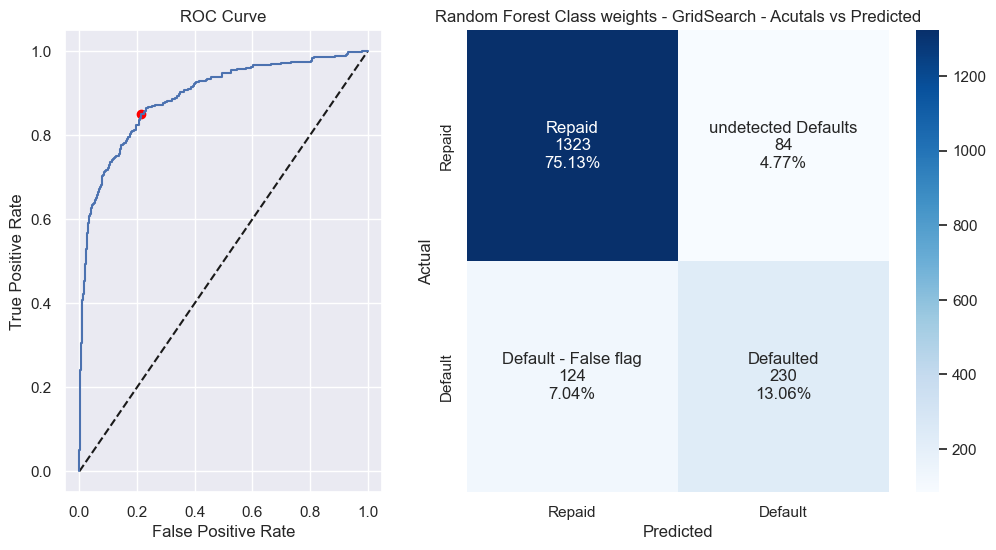

In [43]:
## Let's score

## Train scores
train_acc = rf_cw_best.score(X_train,y_train).round(4)
pred_train = rf_cw_best.predict(X_train).round(4)
y_scores_train = rf_cw_best.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

rf_best_prediction = rf_cw_best.predict(X_test)   # Predict
y_scores = rf_cw_best.predict_proba(X_test)  # Score predictions
metrics_score2("Random Forest Class weights - GridSearch", y_test, rf_best_prediction,  y_scores)    # Print metrics

**Insights - RandomForest with Class-weights**

- We tested 50 different class weights in the range 0.0 through 0.99 for target class loan_default in our RandomForest algorithm, using best-parameters from the previous run. 
- The class weight is 
    {'class_weight': {0: 0.19081632653061226, 1: 0.8091836734693878}}
- During the search process I captured F1 score for each class weight
- Scoring chart indicates that F1 score dramatically after class weight is > 0.78

Let's compare RandomForest, RandomForest GridSearch and RandomForest with Class-weights in the following block
- **Key takeaway** - In RandomForest with Class-weights overfitting is eliminated, with a small sacrifice to Precision, Recall and F1 scores. My take away from Great Learning mentors is that a well-fitted model will perform better than overfitted model in the real world

In [44]:
#comparison_frame[comparison_frame.Model.str.contains('Random')]

<hr>
<br>
<a id="stacked_classification"></a>

&#9194;
**[7. HyperParameters Tuning](#hyperparameter)**
&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[9. Support Vector Machine Classification](#svm)**
&#9193;


### 8. Stacking Classifier - An Ensemble Alogrithm
<hr>

- https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
    - Stacking or Stacked Generalization is an ensemble machine learning algorithm.

    - It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

    - The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.


In [45]:
# Good article on Stacking Classifier https://vitalflux.com/stacking-classifier-sklearn-python-example/

## Step 2A of the process
## Create a Stacking Classifier pipeline

forest = RandomForestClassifier( 
                       n_estimators=50, 
                       max_depth=11, 
                       max_features=11, 
                       criterion='gini',
                       class_weight={0: 0.22714285714285715, 1: 0.7728571428571429}
                    )

dtree = DecisionTreeClassifier(class_weight="balanced", 
                                       max_depth=2,  # Weak learner
                                       min_samples_split=10, 
                                       min_samples_leaf=5, 
                                       max_features=3, 
                                       random_state=42 )

lgclassifier = LogisticRegression(random_state=42)

#
# Create a stacking classifier
#
estimators = [
     ('rf', forest),
     ('dt', dtree)
]

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 

stack_classifier = StackingClassifier(estimators=estimators,
                            final_estimator=lgclassifier,
                            cv=folds)

stack_classifier


StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimators=[('rf',
                                RandomForestClassifier(class_weight={0: 0.22714285714285715,
                                                                     1: 0.7728571428571429},
                                                       max_depth=11,
                                                       max_features=11,
                                                       n_estimators=50)),
                               ('dt',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=2,
                                                       max_features=3,
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [46]:
# Step 2B of the process - fit

stack_classifier.fit(X_train,y_train)  # fit the model
stack_classifier.score(X_test, y_test)

0.9011925042589438

Train AUC: 0.9774, Train Precison: 0.9778, Train Recall: 0.908, Train F1 : 0.9416 

Stacking Classifier - AUC: 0.92

Stacking Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1407
           1       0.83      0.64      0.72       354

    accuracy                           0.90      1761
   macro avg       0.87      0.80      0.83      1761
weighted avg       0.90      0.90      0.90      1761

Best Threshold=0.021734, G-Mean=0.855


<Figure size 1200x600 with 0 Axes>

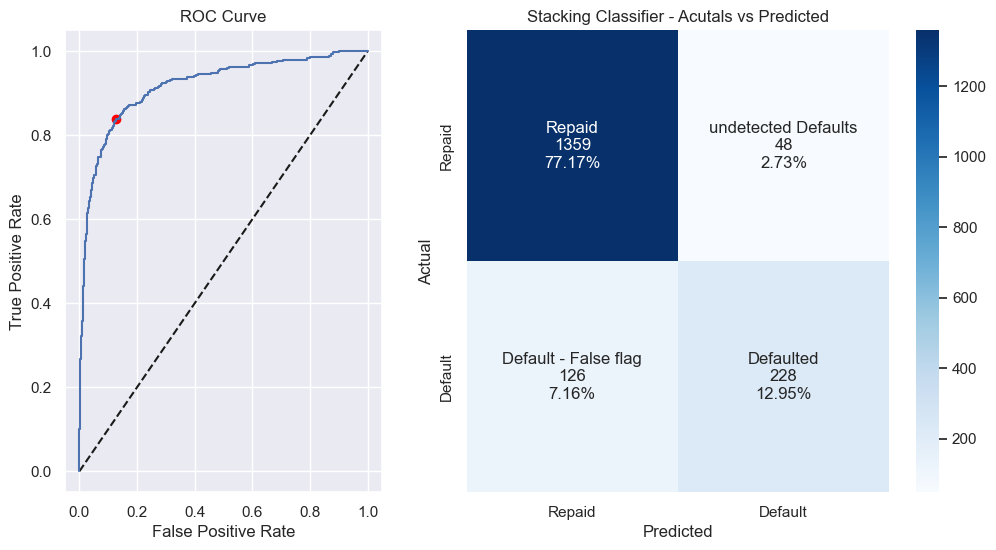

In [47]:
## Train scores
train_acc = stack_classifier.score(X_train,y_train).round(4)
pred_train = stack_classifier.predict(X_train).round(4)
y_scores_train = stack_classifier.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

sclf_prediction = stack_classifier.predict(X_test)   # Predict
y_scores = stack_classifier.predict_proba(X_test)  # Score predictions
metrics_score2("Stacking Classifier", y_test, sclf_prediction, y_scores)    # Print metrics

Bagging and Random Forest for Imbalanced Classification
https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

**Insights Stacking Classification**
- Stacking Classification with tuned DecisionTree and RandomForest Classifier with tuned parameters including class weights is showing good performance without overfitting


In [48]:
#comparison_frame.iloc[[1, 3, 4, 8]]

<a id="svm"> </a>

&#9194;
**[8. Stacked Classification](#stacked_classification)**
&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;
**[10. Comparing Model Performances](#model_performance)**
&#9193;

### 9. Support Vector Machine Classfication

In [49]:
# Build ColumnTransformer

## Build preproccessor
## We used pd.get_dummies as part of Data Preparation. So we don't need to include categorical transformer
## missing numeric values are filledin using SimpleImputer
## SVM needs Scaled data. So we will just run the numeric_transformer

numeric_transformer = Pipeline(steps=[
   ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('onehot', OneHotEncoder(sparse=False))])

preprocessor = ColumnTransformer(
   remainder = 'passthrough',
   verbose_feature_names_out=False,
   transformers=[
       ('numeric', numeric_transformer, num_features)       
])

## Build Classifier

svm_classifier = Pipeline(
   steps=[
       ("preprocessor", preprocessor),
       ("svm", SVC(C = 0.001, kernel='linear', probability=True, random_state=42))
   ]
)

svm_classifier



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['loan_amount',
                                                   'property_value',
                                                   'years_on_job',
                                                   'num_delinq_reports',
                                                   'num_delinquencies',
                                                   'credit_line_age',
                                                   'num_credit_inquiries',
                                                   'num_credit_lines'])],
                                   verbose_feature_names_out=False)),
                ('svm',
                 SVC(C=0.001, kernel='linear', probability=True,
                     random_state=42))])

In [50]:
# Fit and train the model
svm_classifier.fit(X_train,y_train)  # fit the model
svm_classifier.score(X_test, y_test)

0.8160136286201022

Train AUC: 0.9774, Train Precison: 0.9778, Train Recall: 0.908, Train F1 : 0.9416 

SupportVector Classifier - AUC: 0.76

SupportVector Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1407
           1       1.00      0.08      0.16       354

    accuracy                           0.82      1761
   macro avg       0.91      0.54      0.53      1761
weighted avg       0.85      0.82      0.75      1761

Best Threshold=0.088115, G-Mean=0.711


<Figure size 1200x600 with 0 Axes>

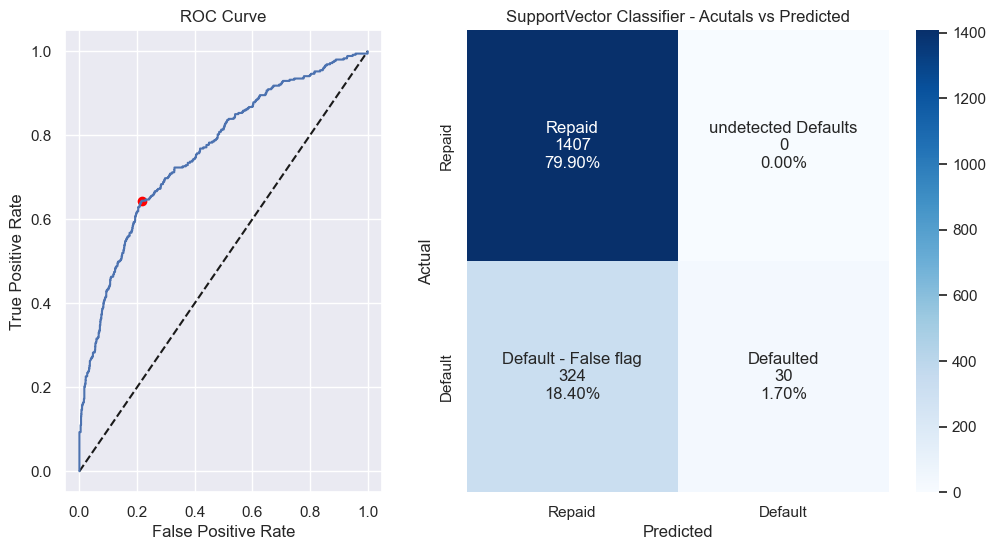

In [51]:
## Train scores
train_acc = stack_classifier.score(X_train,y_train).round(4)
pred_train = stack_classifier.predict(X_train).round(4)
y_scores_train = stack_classifier.predict_proba(X_train).round(4)
train_recall = metrics.recall_score(y_train,pred_train).round(4)
train_precision = metrics.precision_score(y_train,pred_train).round(4)
train_f1 = metrics.f1_score(y_train,pred_train).round(4)

print(f"Train AUC: {train_acc}, Train Precison: {train_precision}, Train Recall: {train_recall}, Train F1 : {train_f1} \n")

# Test Scores
prediction = svm_classifier.predict(X_test)   # Predict
y_scores = svm_classifier.predict_proba(X_test)  # Score predictions
metrics_score2("SupportVector Classifier", y_test, prediction, y_scores)    # Print metrics

**Insigths - Support Vector Machine**

- Support Vector Machine tries to find the best hyperplane. The main difference is that, LogisticRegression is a probabilistic approach whereas Support Vector machine is based on statistical approaches.
- Independent numeric variables need to be scaled. For this reason, I used a ColumnTransformer that scales numeric data. It is a preprocessing step
- I skipped on categorical variable (job_type) for this demo. In theory, SVM cannot to be applied here directly since it is based on
 Euclidean distances. 

- RobustScaler is used to scale numeric data
    - RobustScaler answers the question: How far is each data point from the input’s median?
    - Since outliers have significant influence on the outcome, this is a better option over StandardScaler
        - https://proclusacademy.com/blog/robust-scaler-outliers/
 
- Compare the effect of different scalers on data with outliers
    - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

<a id="model_performance"> </a>

&#9194;
**[8. Stacked Classification](#stacked_classification)**
&emsp;&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;&emsp;
**[11. Summary and Insights](#summary)**
&#9193;

### 10. Comparing Model Performances
[Performance Report](#performance_report)

In [52]:
#@title
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train).round(2)
    pred_test = model.predict(X_test).round(2)
    train_recall = metrics.recall_score(y_train,pred_train).round(2)
    test_recall = metrics.recall_score(y_test,pred_test).round(2)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [53]:
#@title
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train).round(2)
    pred_test = model.predict(X_test).round(2)
    train_precision = metrics.precision_score(y_train,pred_train).round(2)
    test_precision = metrics.precision_score(y_test,pred_test).round(2)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [54]:
#@title
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train).round(2)
    test_acc = model.score(X_test,y_test).round(2)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [55]:
#@title
##  Function to calculate accuracy score
def get_f1_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    d = [] # defining an empty list to store train and test results

    pred_train = model.predict(X_train).round(2)
    pred_test = model.predict(X_test).round(2)
    train_f1 = metrics.f1_score(y_train,pred_train).round(2)
    test_f1 = metrics.f1_score(y_test,pred_test).round(2)
    
    d.append(train_f1) # adding train accuracy to list
    d.append(test_f1) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.f1_score(X_train,y_train))
        print("Accuracy on test set : ",model.f1_score(X_test,y_test))
    
    return d # returning the list with train and test scores

In [56]:
#@title
# Make the list of all the model names 
from sklearn.metrics import (
        confusion_matrix, classification_report,accuracy_score,
        precision_score,recall_score,f1_score, roc_curve, roc_auc_score )

models = [lr_classifier, dt_classifier, rf_classifier, rf_best, rf_cw_best, bg_classifier, 
              ada_classifier, xgb, hgb_classifier, stack_classifier]
model_names = [
                'LogisticRegression', 
                'DecisionTree Classifier', 
                'RandomForest Classifier',
                'RandomForest Classifier - GridSearch',
                'RandomForest Classifier - Class weights',
                'BaggingClassifier', 
                'AdaBoostClassifier', 
                'XGBClassifier', 
                'HistGradientBoosting',
                'Stacking Classifier']


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_sc = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    
    # f1 score
    m = get_f1_score(model,False)
    f1_train.append(m[0])
    f1_test.append(m[1])
    
    # auc_roc_score
    y_scores = model.predict_proba(X_test)
    n = roc_auc_score(y_test,y_scores[:,1]).round(2)
    roc_auc_sc.append(n)


In [57]:
#@title

comparison_frame = pd.DataFrame({'Model': model_names, 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_F1': f1_train,
                                          'Test_F1': f1_test,
                                          'ROC-AUC Score': roc_auc_sc}) 


<a id="performance_report"> </a>

### Performance Report
<hr>

[ToC](#toc)
&ensp;&#9679;&ensp;
[Logistic Regression](#logistic_regression)
&ensp;&#9679;&ensp;
[Decision Tree Classification](#decision_tree)
&ensp;&#9679;&ensp;
[RandomForest Classification](#RandomForest)
&ensp;&#9679;&ensp;
[RandomForest Hyperparameter](#rf_hyperparm)
&ensp;&#9679;&ensp;
[RandomForest Tuning with Class weights](#rf_weights)
&ensp;&#9679;&ensp;
[Bagging Classifier](#BaggingClassifier)
&ensp;&#9679;&ensp;
[AdaBoost Classifier](#AdaBoostClassifier)
&ensp;&#9679;&ensp;
[XGBoost Classifier](#XGBoostClassifier)
&ensp;&#9679;&ensp;
[HistGradientBoosting](#HistGradientBoostingClassifier)
&ensp;&#9679;&ensp;
[Stacking Classifier](#stacked_classification)
&ensp;&#9679;&ensp;
[Support Vector Classifier](#svm)

In [67]:
cp_temp = comparison_frame.sort_values('Test_F1', ascending=False).astype(str)
def highlight_sc(x):
    if x.Model in 'HistGradientBoosting':
        return ['background-color: lightblue; font-weight: bold']*10
    else:
        return ['background-color: default']*10
    
cp_temp.style.apply(highlight_sc, axis=1)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,ROC-AUC Score
2,RandomForest Classifier,1.0,0.92,1.0,0.64,1.0,0.95,1.0,0.77,0.96
8,HistGradientBoosting,0.97,0.91,0.85,0.6,1.0,0.92,0.92,0.73,0.93
9,Stacking Classifier,0.98,0.9,0.91,0.64,0.98,0.83,0.94,0.72,0.92
4,RandomForest Classifier - Class weights,0.95,0.88,0.86,0.65,0.88,0.73,0.87,0.69,0.89
7,XGBClassifier,0.97,0.89,0.86,0.54,0.99,0.83,0.92,0.66,0.89
3,RandomForest Classifier - GridSearch,0.96,0.89,0.81,0.51,1.0,0.9,0.9,0.65,0.92
6,AdaBoostClassifier,0.88,0.8,0.85,0.68,0.65,0.51,0.74,0.58,0.84
5,BaggingClassifier,0.81,0.79,0.74,0.71,0.52,0.48,0.61,0.57,0.82
0,LogisticRegression,0.77,0.76,0.64,0.63,0.45,0.43,0.53,0.51,0.77
1,DecisionTree Classifier,0.76,0.72,0.67,0.63,0.43,0.38,0.52,0.47,0.71


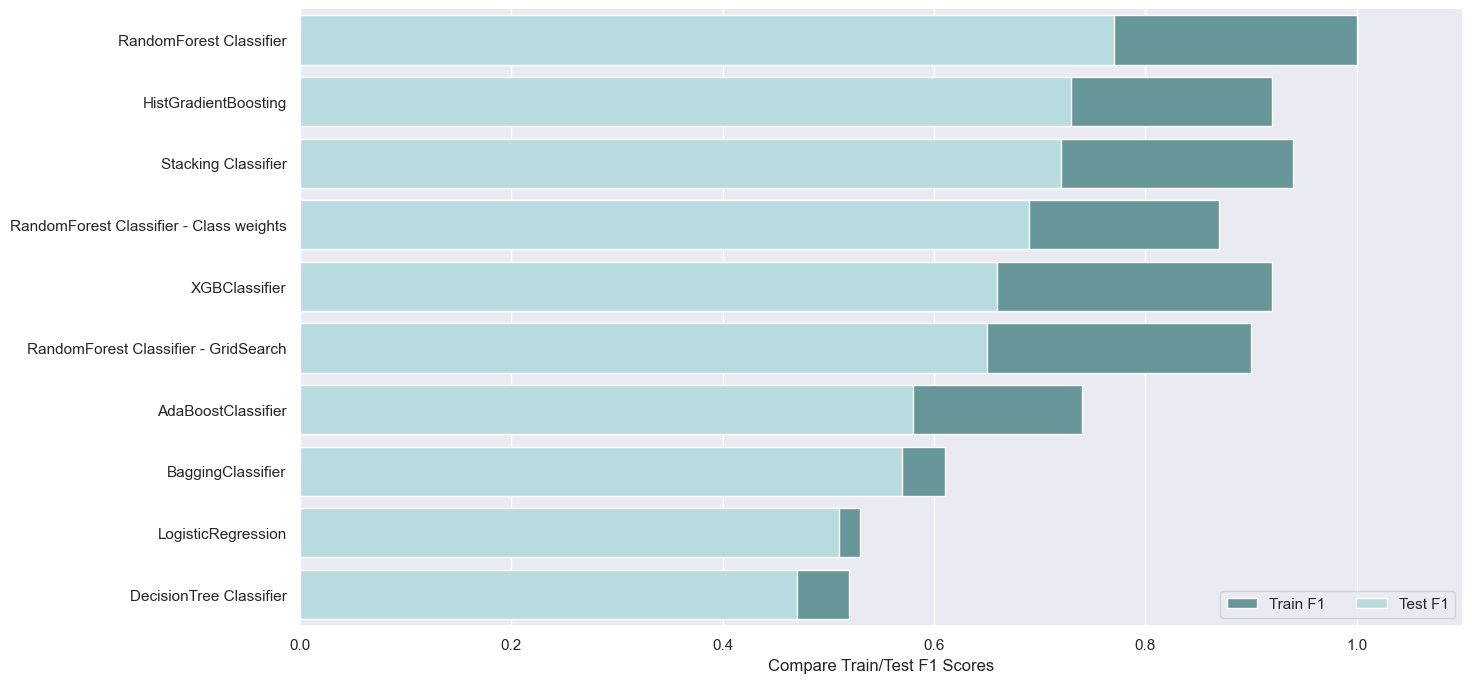

In [68]:
# Plot the Train F1 and Test F1 scores
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(x="Train_F1", y="Model", data=comparison_frame.sort_values('Test_F1', ascending=False),
            label="Train F1", color="cadetblue")

# Plot Test F1
sns.set_color_codes("muted")
sns.barplot(x="Test_F1", y="Model", data=comparison_frame.sort_values('Test_F1', ascending=False),
            label="Test F1", color="powderblue")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1.1), ylabel="",
       xlabel="Compare Train/Test F1 Scores")
sns.despine(left=True, bottom=True)

<a id="summary"> </a>

&#9194;
**[9. Stacked Classification](#stacked_classification)**
&emsp;&emsp;&emsp;
**[Table of Contents](#toc)**
&emsp;&emsp;&emsp;
**[11. Testing for Null Hypothesis](#nullhypothesis)**
&#9193;

## 10. Summary and Insights

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- LogisticRegression scores provide base line for comparision. Its scores are lower than other models. But Train and Test scores are very close to each other. We can confidently say that there is less overfitting
- RandomForest and DecisionTree are falling into the overfitting area. Their training scores 1.0 or closer. Test scores are much lower. Issue with here is number of 
- Stacking Classification(SC) is a good Ensemble algorithm for implementation. It uses DecisionTree, RandomForest as models which are easier to explain.
- HistGradientBoosting is the best choice. It is highly performant on large data sets. F1 Score is high and better than other models
    - F1 Score is almost identical to Stacking Classifier
    - However, this model is better at discriminating **Actual defaults versus Potential defaults**

**2. Refined insights:**
- HistGradientBoosting Classification is a good choice.
    - Key advantage is that Categorical variables do not need to be encoded.
- Missing values are issue. Missing values can occur at random, or due to an issue with upstream application.
- Model metrics should be measured on a regular basis, to avoid model drift. Model drift can occur due changes in data profile or application changes that fixes missing values
- For this implementation, data selection threshold is set to 5. Any row that has more than 5 null values is dropped. Data quality is important for good predictions
- Performance comparision clearly shows improving Precision, Recall and F1 scores.
- Using Pipeline, we can streamline model development process. Seperating Data preparation and Model execution into different steps allows to focus more on model building and metrics
- Mortgage due is NOT used model training. It has high correlation to property_value amount and more missing values
- RobustScaler is used for scaling numeric data, since target class is sensitive to outliers

- **Issue with Debt to Income ratio**
    - There are a large number of missing values. approxmately 21%
    - This predictor variable has heavily influences the outcome, when missing values are filled-in using various algorithm
    - For this exercise this variable is NOT considered.
    - Further investigation and guidance required on how to account for this issue.


**3. Proposal for the final solution design:** 
- My recomendation is HistGradientBoosting Classification as final solution design which is highlighted in Performance section. Primary reason being
    - F1 score is almost identical
    - However, this model is better at discriminating **Actual defaults versus Potential defaults**
    - It discretizes the feature values into histograms, which reduces the memory footprint and speeds up the computations.
    - The histogram-based approach used by HistGradientBoostingClassifier is particularly advantageous when dealing with large datasets, as it avoids the need to sort the data or perform explicit binning of features. This leads to faster training times and reduced memory usage.
    
- Precision, Recall and F1 score have shown gradual improvement with each cycle. All roads leading to HistGradientBoosting Classifier incorporating the best of DecisionTree and RandomForest algorithms


### References

*Top Techniques to Handle Missing Values Every Data Scientist Should Know*
- https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

*Chronic Kidney Disease - Explored !*
- https://www.kaggle.com/code/chayan8/chronic-kidney-disease-explored/notebook

*Statistical Imputation for Missing Values in Machine Learning - Jason Brownlee*
- https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

*Modeling Pipeline Optimization With scikit-learn*
- https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

*A Benchmark for Data Imputation Methods*
- https://www.frontiersin.org/articles/10.3389/fdata.2021.693674/full

*Stacking Ensemble Machine Learning With Python - Jason Brownlee*
- https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

*scikit Learn - Preprocessing data*
- https://scikit-learn.org/stable/modules/preprocessing.html

ChatGPT

<a id ="nullhypothesis"></a>

&#9194;
**[10. Summary and Insights](#summary)**
&emsp;&emsp;&emsp;
**[Table of Contents](#toc)**


### 12. Testing for Null Hypothesis

**Statement**
- It is observed outside of the input dataset that loan default rate is higher when Mortgage_due is greater than Property value
- Use Classification model to predict these cases and validate with accuracy, recall and F1 score

**Null Hypthesis**
- Loan defaulte rate is higher - Adverse outcome > 20%

**Alternate Hypthesis**
- There is no difference - Adverse outcome is 20% approx
- They are other factors that influence loan defaults

**Please note** : Property value is not used for model training. It is dropped as part of the Pipeline. For this test, it is filter to select a subset of the data from the test set


In [60]:
# From the test dataset extract a subset of rows where mortage_due is greater value of the property
# We want to test on data unseen by the model during training

X1_test = X_test[hm.MORTDUE > hm.VALUE]
y1_test = y_test[hm.MORTDUE > hm.VALUE]

In [61]:
X1_test.head(10).T

,3946,4513,3972,5496,339,4225,3739,5540,50,457
loan_amount,20600.000000,23500.000000,20800.000000,33500.000000,6100.000000,22000.000000,19800.000000,35000.000000,3100.000000,6900.000000
property_value,125839.000000,118200.000000,126763.000000,42013.000000,65321.000000,12500.000000,14609.000000,39401.000000,36100.000000,51952.000000
years_on_job,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,1.500000,5.000000
num_delinq_reports,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
num_delinquencies,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
credit_line_age,97.109584,103.672786,102.422388,201.612299,153.066783,117.766667,62.359738,210.501817,153.166667,87.900118
num_credit_inquiries,3.000000,2.000000,2.000000,2.000000,0.000000,6.000000,1.000000,3.000000,1.000000,0.000000
num_credit_lines,34.000000,34.000000,33.000000,50.000000,22.000000,23.000000,17.000000,50.000000,14.000000,17.000000
job_type_Mgr,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
job_type_Office,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Stacking Classifier - AUC: 0.94

Stacking Classifier Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.60      0.75      0.67         4

    accuracy                           0.82        17
   macro avg       0.76      0.80      0.77        17
weighted avg       0.84      0.82      0.83        17

Best Threshold=0.050501, G-Mean=0.920


<Figure size 1200x600 with 0 Axes>

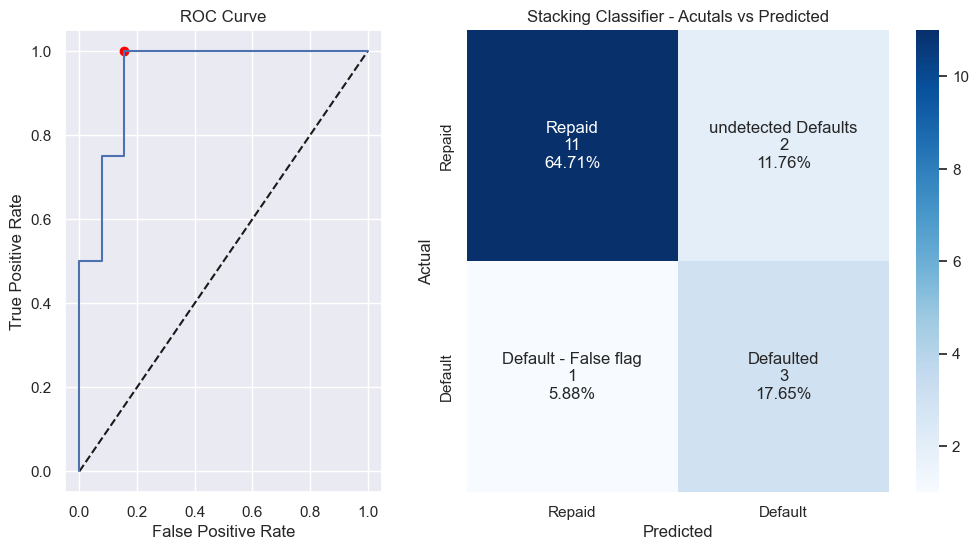

In [62]:
# X1 is input data into the model
# X1 has Null values in both numberical and categorical columns 
#    - loan_reason, num_delinq_reports, num_delinquencies, debt_income_ratio

# Use Stacking Classification model that was built as part of this exercise
#     - This model is a pipline
#     - The model uses IterativeImputer to fillin missing values
#     - Base Models - DecisionTree, RandomForest (with Tuned Hyperparameters)
#     - Meta model - Logistic Regression with default parameters
#
# Fit, Predict, Score

sclf_prediction = stack_classifier.predict(X1_test)   # Predict
y_scores = stack_classifier.predict_proba(X1_test)  # Score predictions
metrics_score2("Stacking Classifier", y1_test, sclf_prediction, y_scores)    # Print metrics

### Observation

- **Null Hypothesis is False and rejected**
- **Alternate Hypothesis is True and accepted**

**Problem Statement**
- It is observed outside of the input dataset that loan default rate is higher when Mortgage_due is greater than Property value
- Use Classification model to predict these cases and validate with accuracy, recall and F1 score

**Results**
- Mortgage due amount being greater than Property value does not increase the likelyhood of a loan defaulting
- There are other factors that influence loan defaults. Further investigation is necessary